In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import sklearn.metrics as metrics

### Features para Temperatura Minima

In [2]:
target= ['TEMPERATURA MINIMA (C)']
features = ['Altitude(metros)',
                         'Latitude',
                         'Longitude',
                         'UMIDADE RELATIVA DO MAXIMA AR (%)',
                         'UMIDADE RELATIVA DO MINIMA AR (%)']
features

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'UMIDADE RELATIVA DO MAXIMA AR (%)',
 'UMIDADE RELATIVA DO MINIMA AR (%)']

### Criando o dataframe que ira guardar os valores d

In [3]:
data_tmin_erros = pd.DataFrame(columns=['Month','Qto_estacoes','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE'])

### Pegando as base de dados do primeiro mês


In [4]:
data_mean_jan = pd.read_csv('../Dados/Brasil_1_mean.csv')

In [5]:
data_mean_jan.describe().T

,count,mean,std,min,25%,50%,75%,max
Altitude(metros),458.0,365.521834,282.831588,2.000000,108.250000,318.500000,557.250000,997.000000
Codigo OMM,458.0,85201.056769,2325.371846,81609.000000,81950.250000,86710.000000,86854.750000,86998.000000
Day,458.0,15.927174,0.283932,12.296099,15.858514,15.997478,16.003929,16.647280
H(UTC),458.0,11.587590,0.172818,11.338053,11.497550,11.509815,11.619378,13.223013
Latitude,458.0,-15.371909,8.276341,-33.742297,-21.949157,-15.290187,-8.505388,3.813583
Longitude,458.0,-48.015097,7.263208,-72.786778,-52.955566,-48.228444,-42.155827,-34.815627
Month,458.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PRECIPITACAO (mm),458.0,0.248918,0.118368,0.014519,0.161988,0.230883,0.331988,0.820430
PRESSAO ATMOSFERICA (hPa),458.0,970.463632,31.018293,902.892063,949.023218,974.637815,998.353330,1013.233360
PRESSAO ATMOSFÉRICA MAXIMA (hPa),458.0,970.749562,31.026400,903.143750,949.286285,974.962664,998.617348,1013.462668


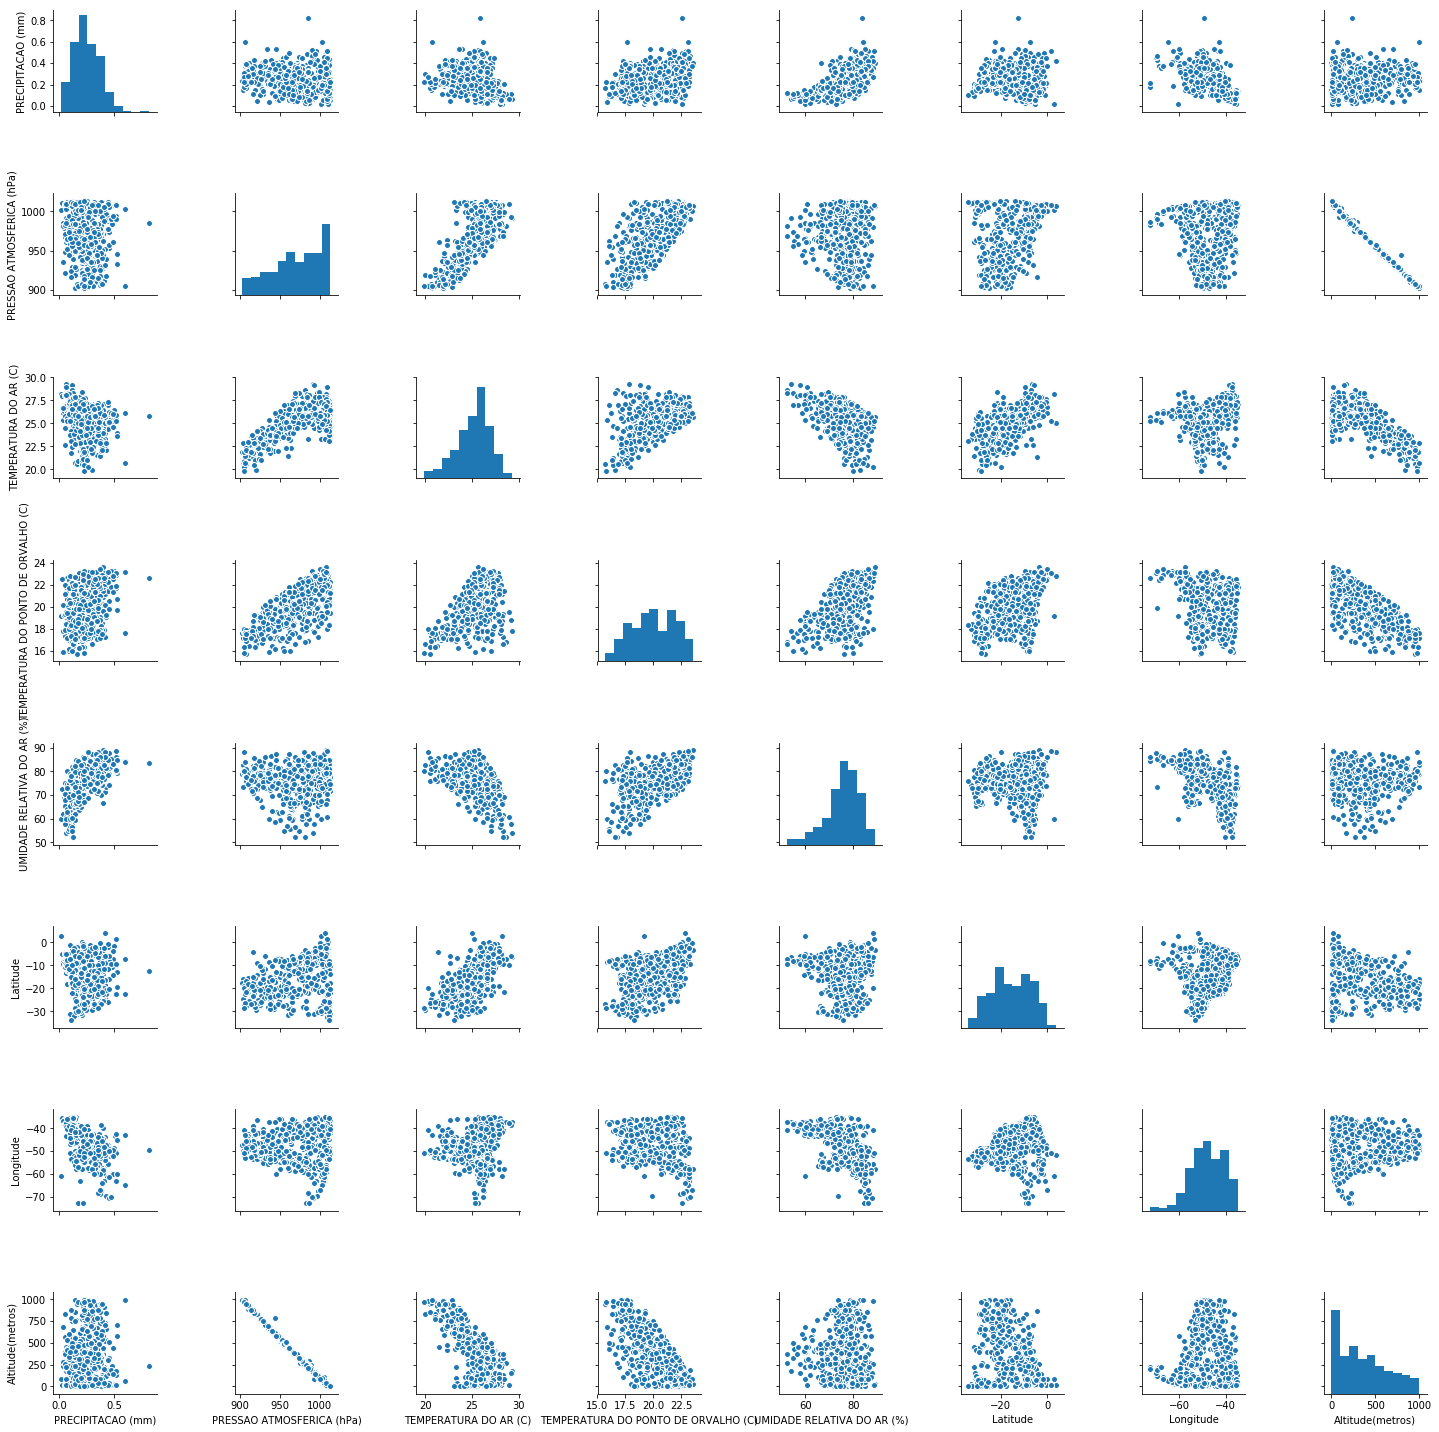

In [6]:
sns.pairplot(data_mean_jan[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [129]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_jan[features], 
                                                    data_mean_jan[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)


mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9678660529105334
MAE: 0.2602539520637198
MSE: 0.1144367767923239
MSLE: 0.00017734611343696516
MedLE: 0.18823306909995452
R2 Score: 0.9678030290481298
Error(UR_true - UR_pred)
MIN: 0.0060053822168129045 	MAX: 1.1317958147275071 	MEAN: 0.2602539520637198	Std: 0.2161126031205467


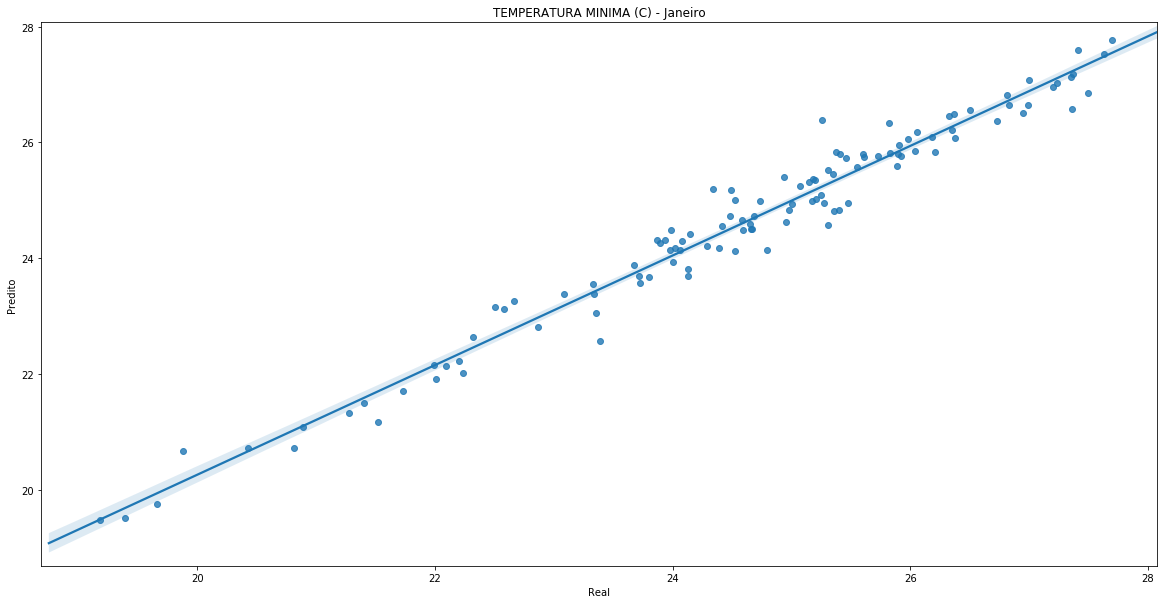

In [130]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Janeiro')
plt.savefig('../Validacao/graph/T_min_jan.png')

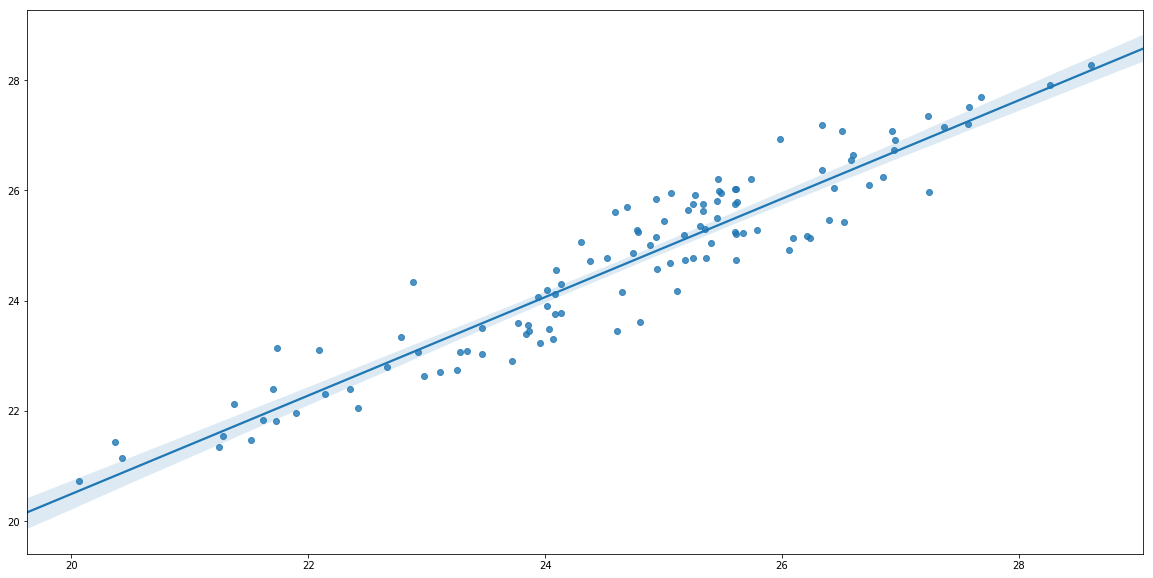

In [25]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [16]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmin_erros.loc[1]=['Janeiro',len(data_mean_jan),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmin_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.285347,0.006426,1.111632,0.226298,0.956822,0.956242,0.285347,0.132634,0.000208,0.22992


In [17]:
pickle.dump(mlp,open('../Models/Tmin/tmin_1.model','wb'))

## Fevereiro

In [18]:
data_mean_fev = pd.read_csv('../Dados/Brasil_2_mean.csv')

In [34]:
data_mean_fev.describe().T

,count,mean,std,min,25%,50%,75%,max
Altitude(metros),458.0,365.041836,283.263611,1.161000,104.750000,318.500000,557.250000,997.000000
Codigo OMM,458.0,85211.521834,2321.364258,81609.000000,81951.250000,86711.500000,86854.750000,86998.000000
Day,458.0,14.716247,0.347290,13.441386,14.582174,14.657739,14.823101,18.333333
H(UTC),458.0,11.575303,0.182531,10.000000,11.500000,11.516221,11.607779,13.281658
Latitude,458.0,-15.386842,8.270897,-33.742297,-21.949157,-15.312444,-8.505388,3.813583
Longitude,458.0,-47.960816,7.169973,-72.747838,-52.921473,-48.193060,-42.155827,-34.815627
Month,458.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
PRECIPITACAO (mm),458.0,0.228806,0.118518,0.000000,0.139196,0.219439,0.299171,0.776980
PRESSAO ATMOSFERICA (hPa),458.0,970.632334,30.900937,903.079480,949.438490,974.775545,998.422340,1013.628806
PRESSAO ATMOSFÉRICA MAXIMA (hPa),458.0,970.655625,31.099888,887.633333,949.339697,974.661230,998.564971,1013.849143


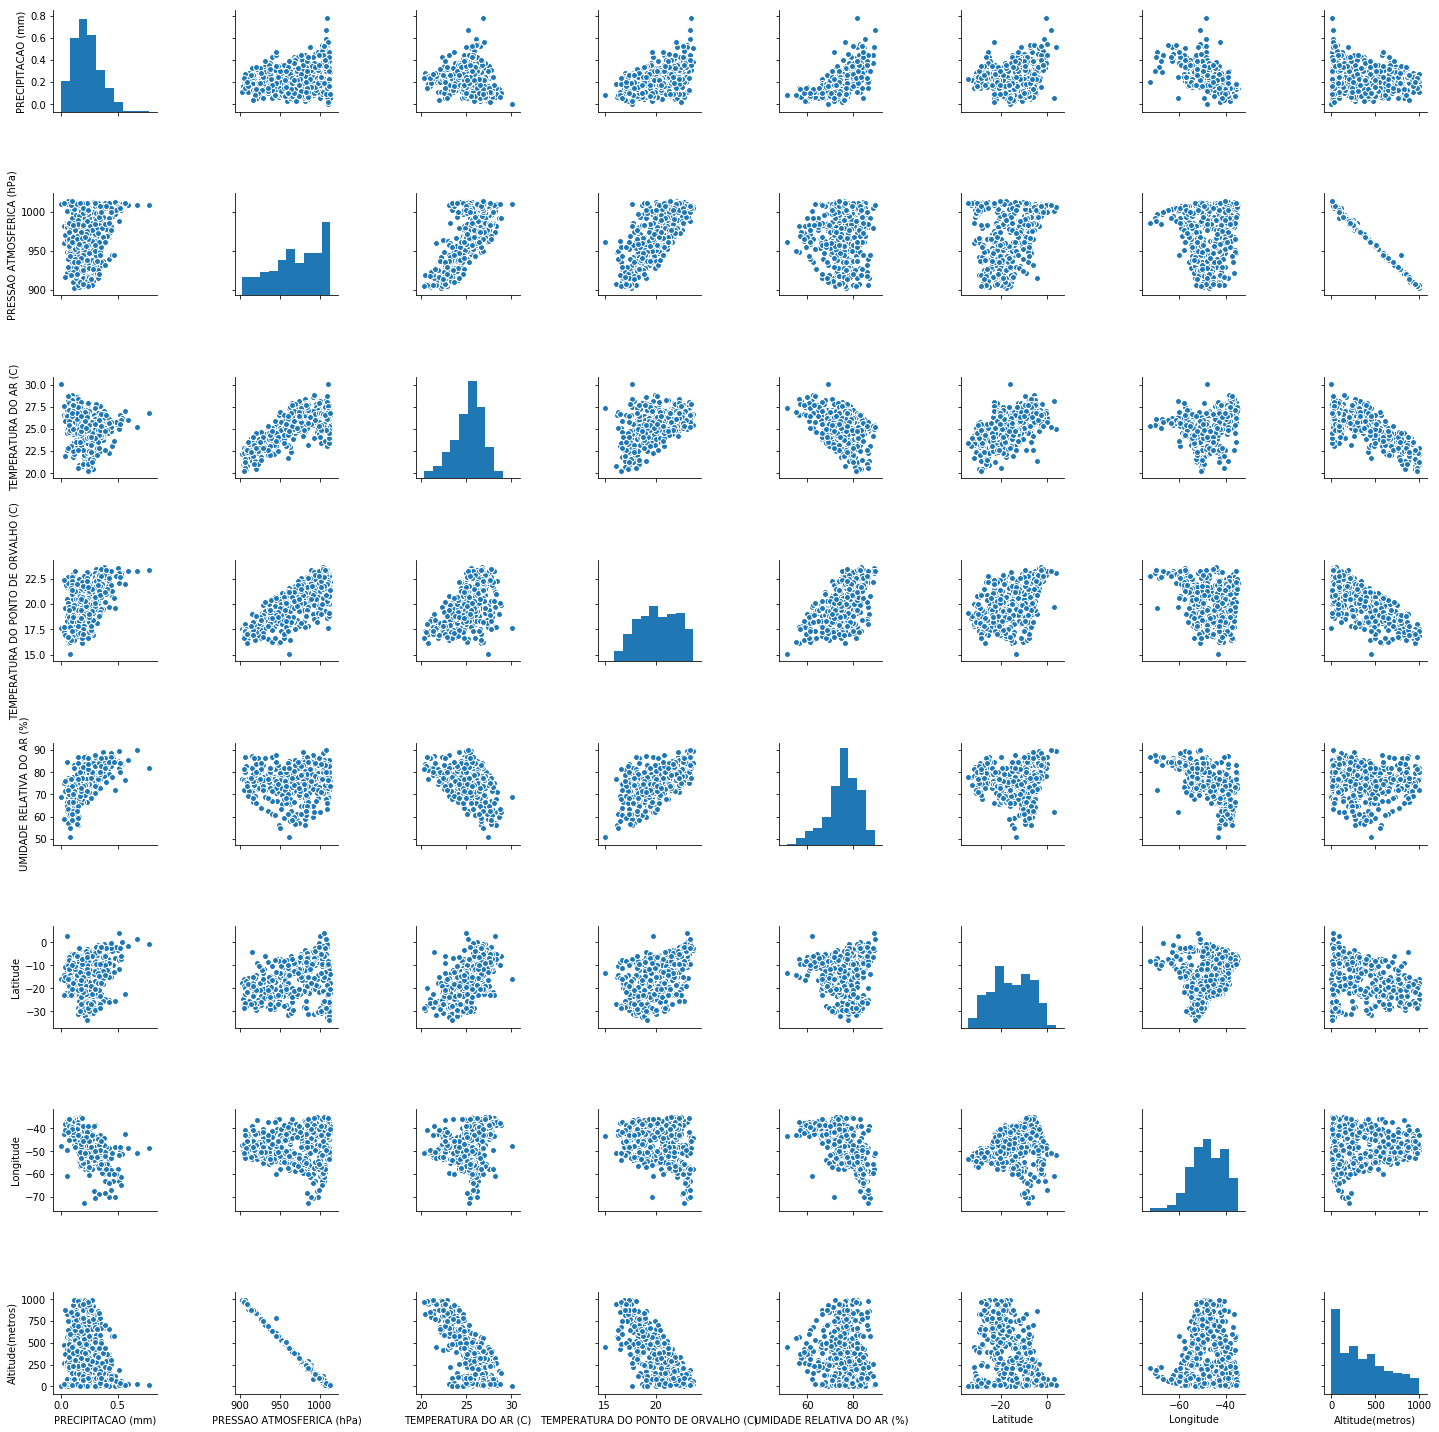

In [35]:
sns.pairplot(data_mean_fev[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [145]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_fev[features], 
                                                    data_mean_fev[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9495054222308136
MAE: 0.2858063817409285
MSE: 0.1380659684685634
MSLE: 0.00021414803316391614
MedLE: 0.22099653858743906
R2 Score: 0.9493544134063179
Error(UR_true - UR_pred)
MIN: 0.001985522567025555 	MAX: 1.1897483766189296 	MEAN: 0.2858063817409285	Std: 0.23744616363445856


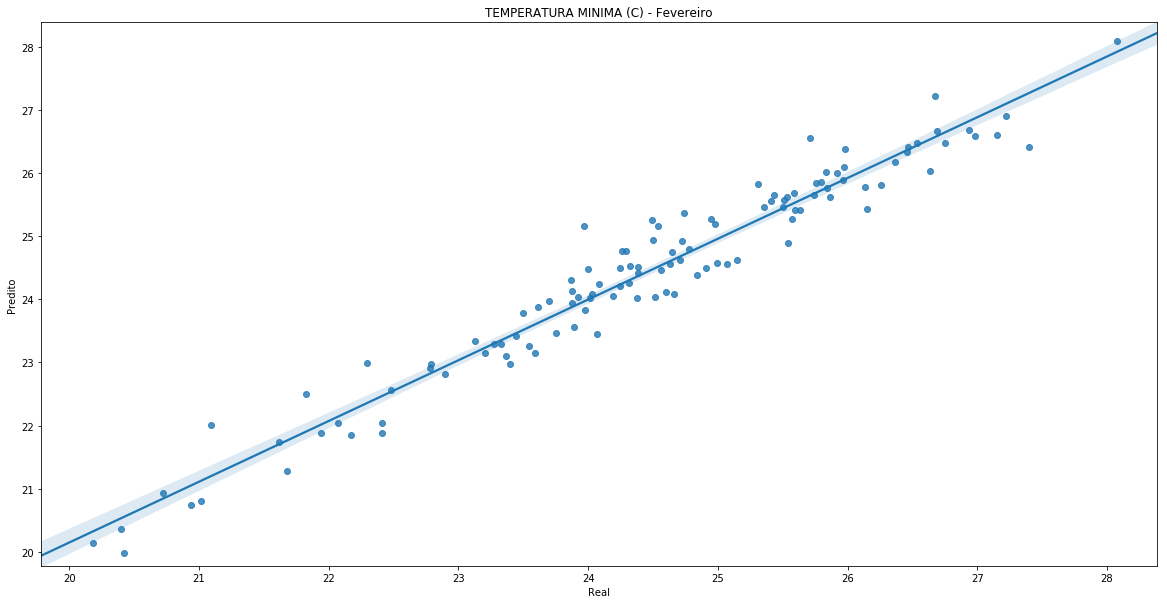

In [146]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min()-.2),max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min()-.2),max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Fevereiro')
plt.savefig('../Validacao/graph/T_min_fev.png')

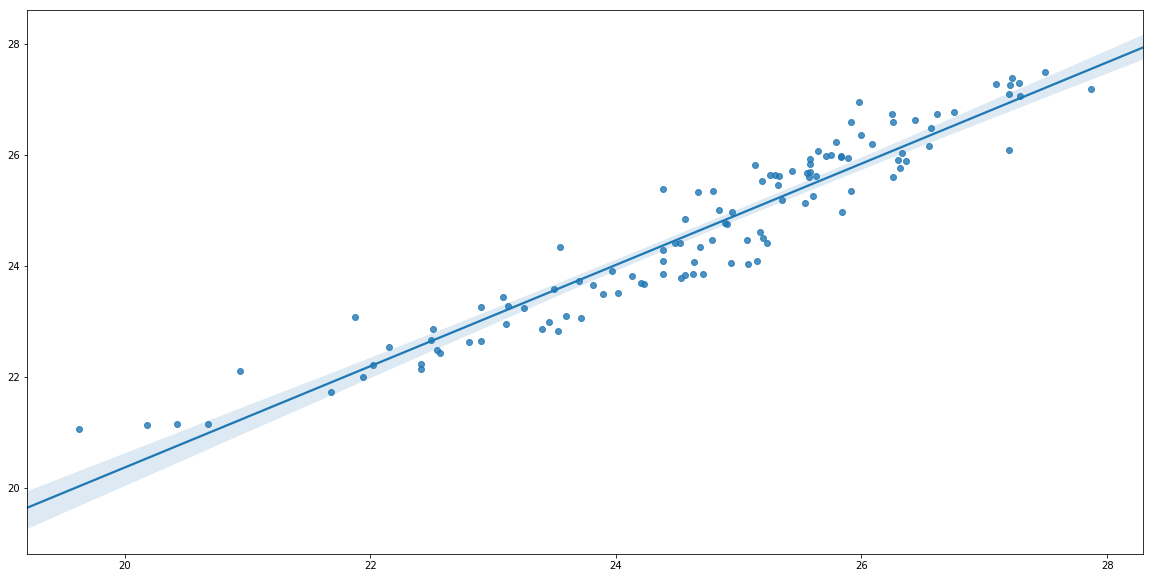

In [40]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [33]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmin_erros.loc[2]=['Fevereiro',len(data_mean_fev),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmin_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.285347,0.006426,1.111632,0.226298,0.956822,0.956242,0.285347,0.132634,0.000208,0.229920
2,Fevereiro,458,0.317814,0.002874,1.012298,0.209892,0.945446,0.945382,0.317814,0.145060,0.000224,0.277784


In [35]:
pickle.dump(mlp,open('../Models/Tmin/tmin_2.model','wb'))

## Março

In [36]:
data_mean_mar = pd.read_csv('../Dados/Brasil_3_mean.csv')

In [46]:
data_mean_mar.describe().T

,count,mean,std,min,25%,50%,75%,max
Altitude(metros),458.0,365.521834,282.831588,2.000000,108.250000,318.500000,557.250000,997.000000
Codigo OMM,458.0,85201.056769,2325.371846,81609.000000,81950.250000,86710.000000,86854.750000,86998.000000
Day,458.0,16.040708,0.567796,14.530171,15.904915,15.973041,16.159549,26.091043
H(UTC),458.0,11.562026,0.142580,11.265600,11.497208,11.510513,11.585007,13.312908
Latitude,458.0,-15.371909,8.276341,-33.742297,-21.949157,-15.290187,-8.505388,3.813583
Longitude,458.0,-48.015097,7.263208,-72.786778,-52.955565,-48.228444,-42.155827,-34.815627
Month,458.0,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000
PRECIPITACAO (mm),458.0,0.233774,0.120631,0.025538,0.150367,0.207366,0.294752,0.908465
PRESSAO ATMOSFERICA (hPa),458.0,971.032329,30.940823,903.204705,949.782916,975.272327,999.104140,1014.392136
PRESSAO ATMOSFÉRICA MAXIMA (hPa),458.0,971.324430,30.954617,903.464998,950.079018,975.567477,999.418237,1014.607337


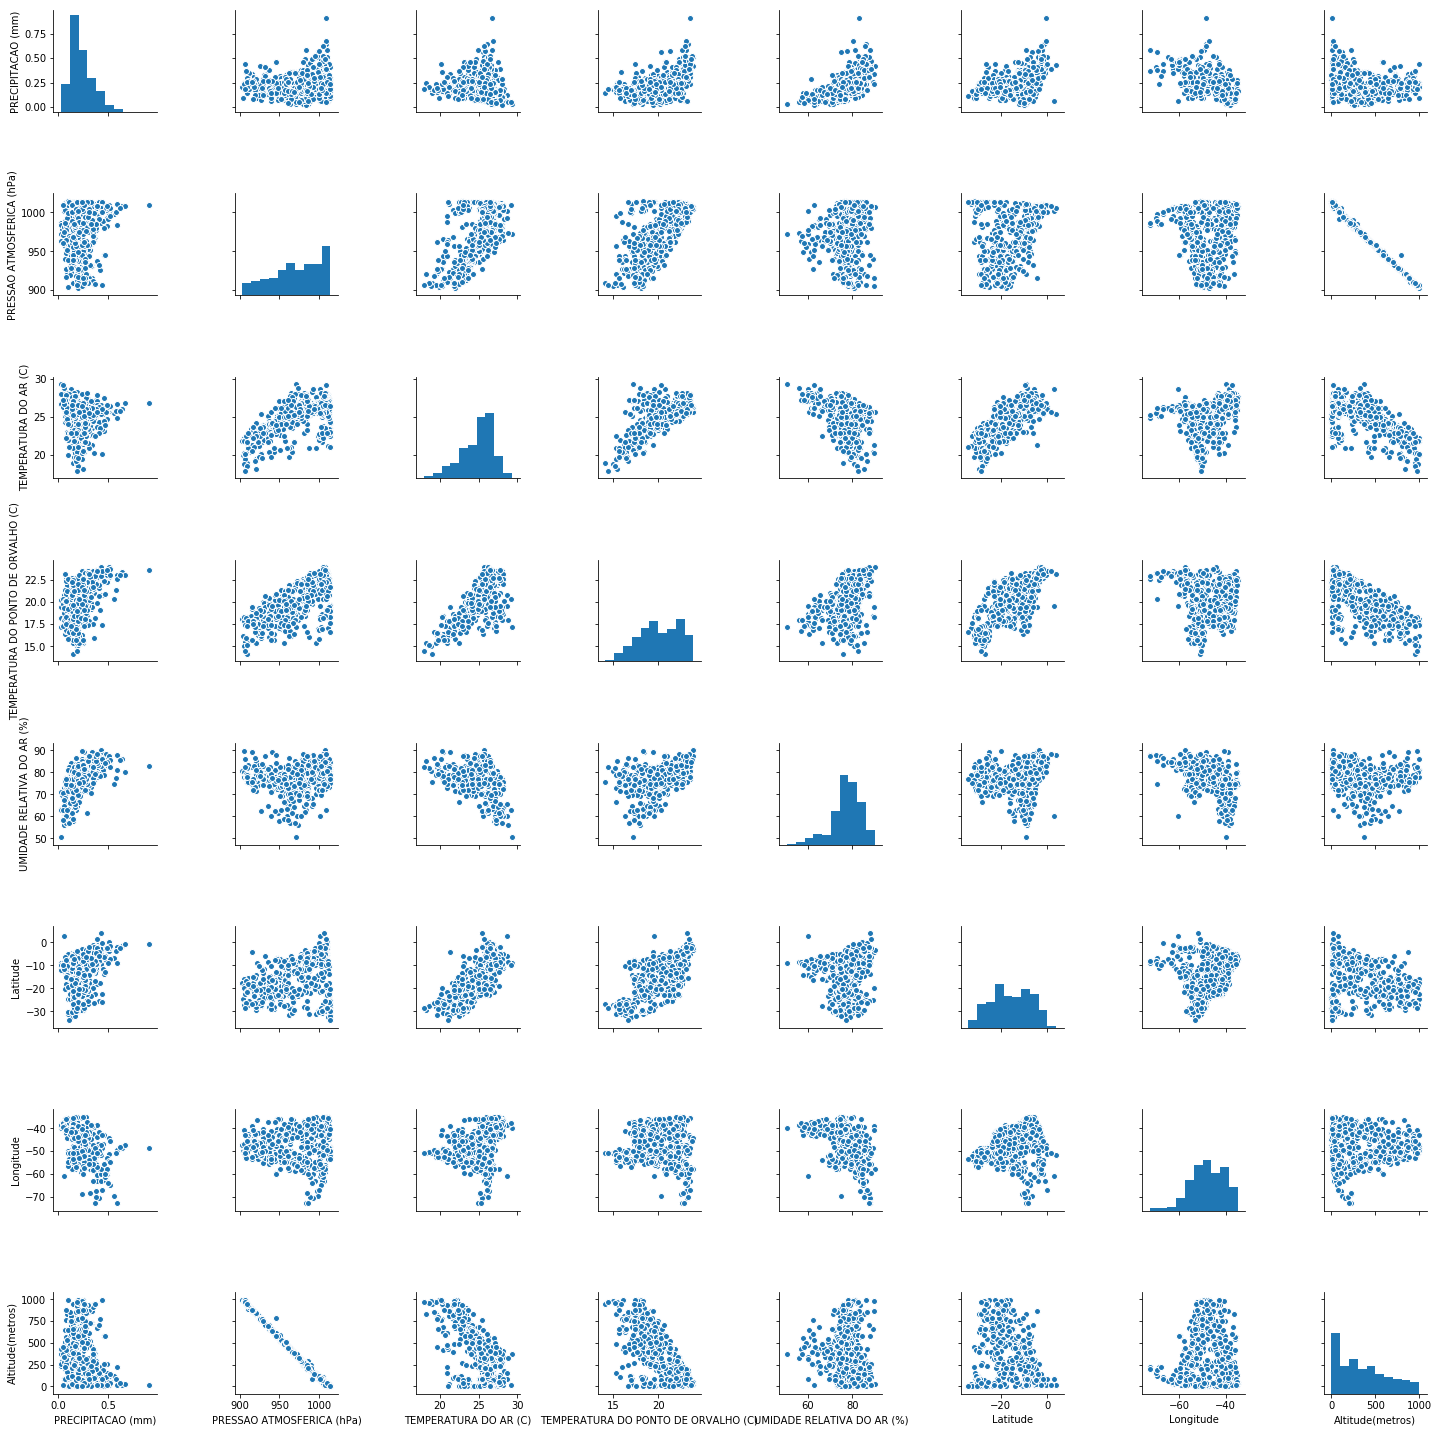

In [47]:
sns.pairplot(data_mean_mar[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [161]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_mar[features], 
                                                    data_mean_mar[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(.1,.9))
scaler_y = MinMaxScaler(feature_range=(.1,.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='adam', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.0785394497238816
MAE: 3.549820468819406
MSE: 15.237768018127245
MSLE: 0.02540650346693409
MedLE: 3.8093057704491144
R2 Score: -2.1936620730608363

Error(UR_true - UR_pred)

MIN: 0.016403526385772693 
MAX: 7.7433866456992995 
MEAN: 3.549820468819406
Std: 1.6237434086942477


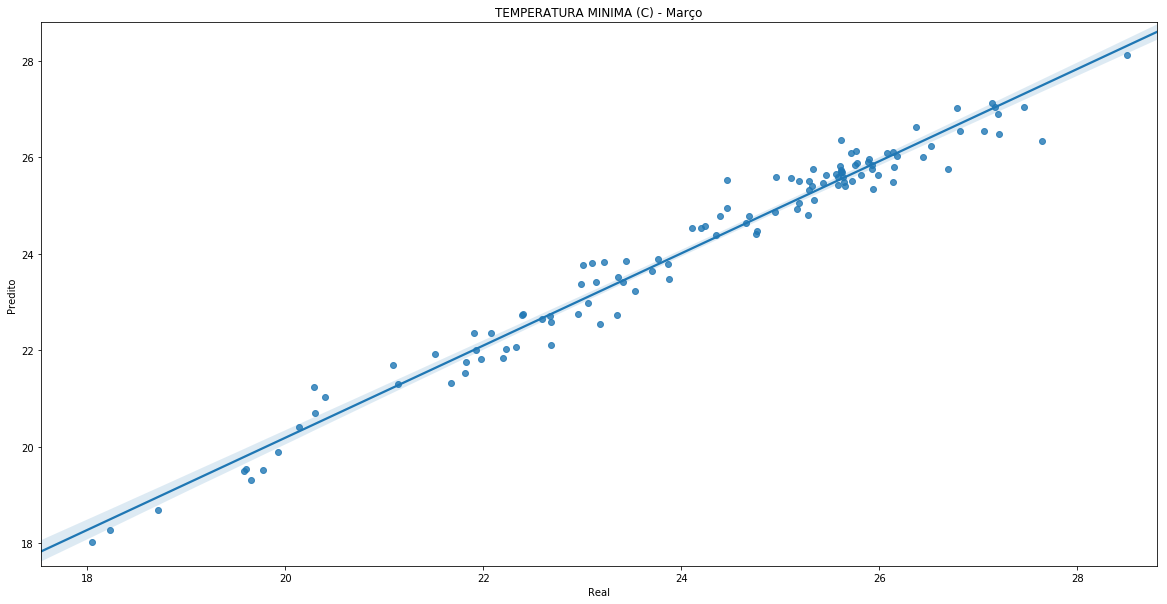

In [150]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Março')
plt.savefig('../Validacao/graph/T_min_mar.png')

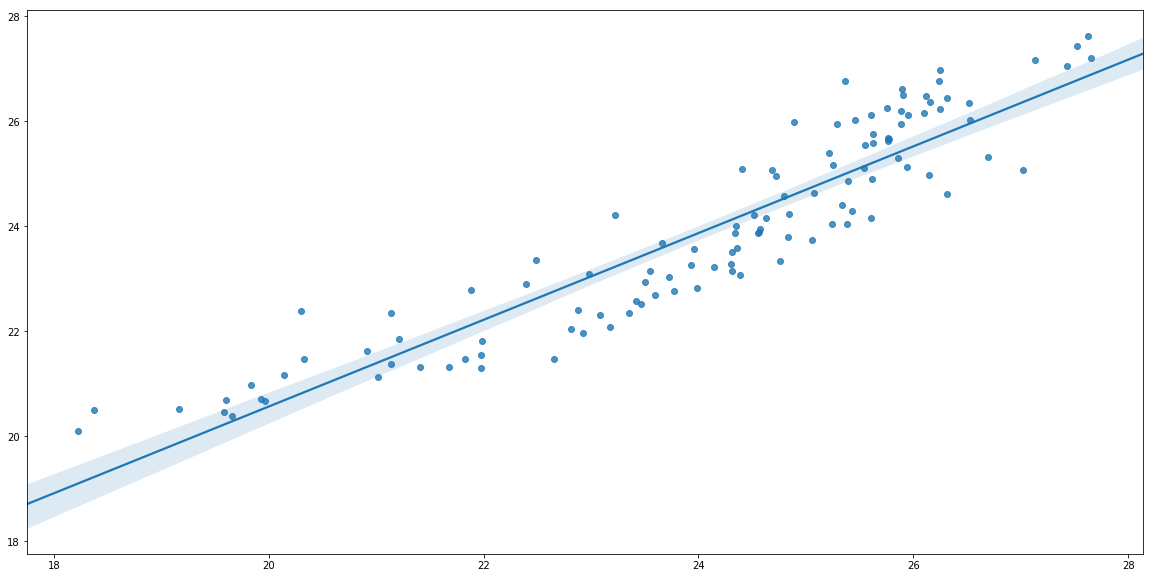

In [57]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [39]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmin_erros.loc[3]=['Março',len(data_mean_mar),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmin_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.285347,0.006426,1.111632,0.226298,0.956822,0.956242,0.285347,0.132634,0.000208,0.229920
2,Fevereiro,458,0.317814,0.002874,1.012298,0.209892,0.945446,0.945382,0.317814,0.145060,0.000224,0.277784
3,Março,458,0.319620,0.003542,1.132784,0.244037,0.971480,0.970403,0.319620,0.161711,0.000259,0.263184


In [40]:
pickle.dump(mlp,open('../Models/Tmin/tmin_3.model','wb'))

## Abril

In [41]:
data_mean_abr = pd.read_csv('../Dados/Brasil_4_mean.csv')

In [62]:
data_mean_abr.describe().T

,count,mean,std,min,25%,50%,75%,max
Altitude(metros),461.0,364.586033,282.651302,1.161000,107.000000,313.000000,552.000000,997.000000
Codigo OMM,461.0,85210.475054,2320.705839,81609.000000,81951.000000,86709.000000,86854.000000,86998.000000
Day,461.0,15.552991,0.394948,12.750503,15.446159,15.500000,15.641237,18.786477
H(UTC),461.0,11.560754,0.159746,10.000000,11.500000,11.513161,11.579529,13.293187
Latitude,461.0,-15.353329,8.254668,-33.742297,-21.855567,-15.280215,-8.509552,3.813583
Longitude,461.0,-48.016664,7.239974,-72.786778,-52.931912,-48.201231,-42.182817,-34.815627
Month,461.0,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000
PRECIPITACAO (mm),461.0,0.180172,0.113583,0.000000,0.107191,0.145225,0.219882,0.812440
PRESSAO ATMOSFERICA (hPa),461.0,971.925316,30.858510,904.032124,950.418699,976.124845,999.629611,1019.666667
PRESSAO ATMOSFÉRICA MAXIMA (hPa),461.0,971.922557,31.032397,890.033333,950.584625,976.183617,999.613160,1015.726752


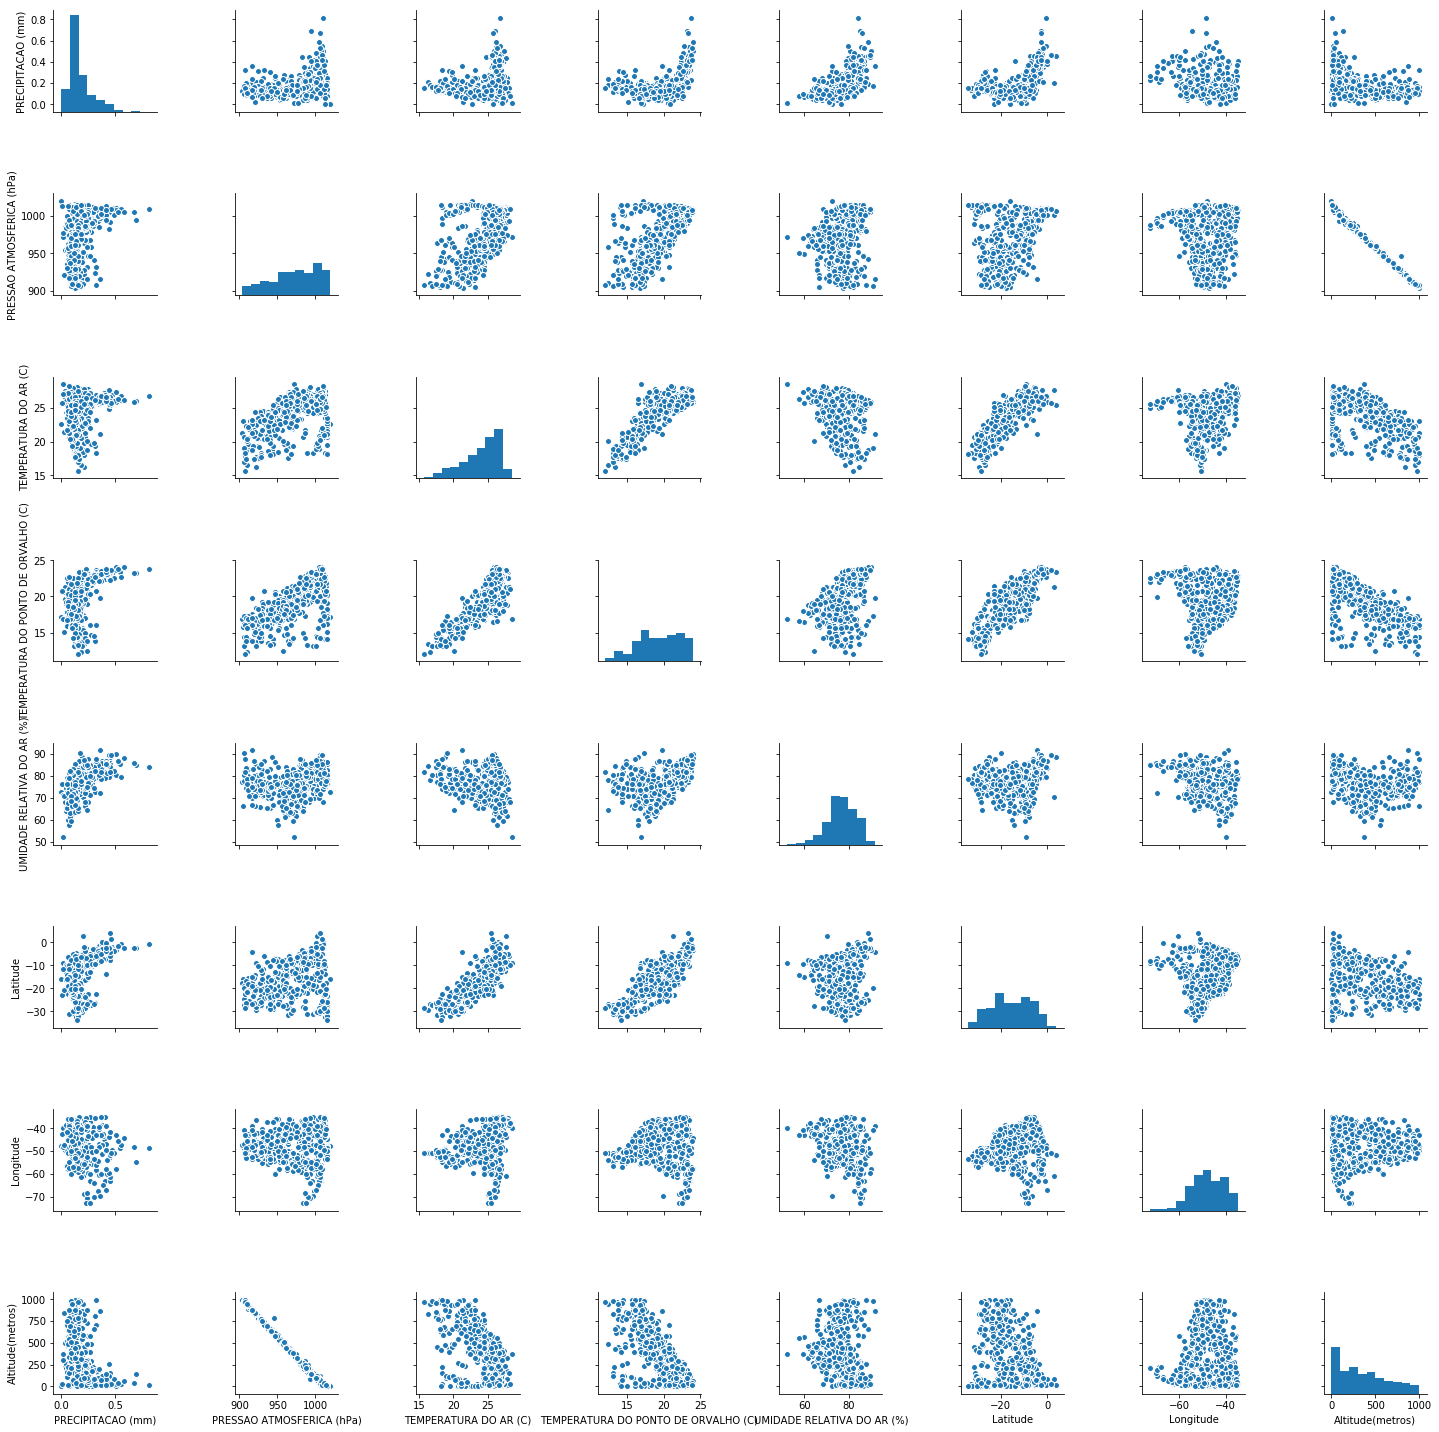

In [63]:
sns.pairplot(data_mean_abr[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_abr[features], 
                                                    data_mean_abr[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9754982517103714
MAE: 0.3181313695876291
MSE: 0.16430642741391488
MSLE: 0.0003000309271650469
MedLE: 0.2602359183235645
R2 Score: 0.9753109005688708

Error(UR_true - UR_pred)

MIN: 0.018382498727358865 
MAX: 1.2305019910549468 
MEAN: 0.3181313695876291
Std: 0.2511948628021963


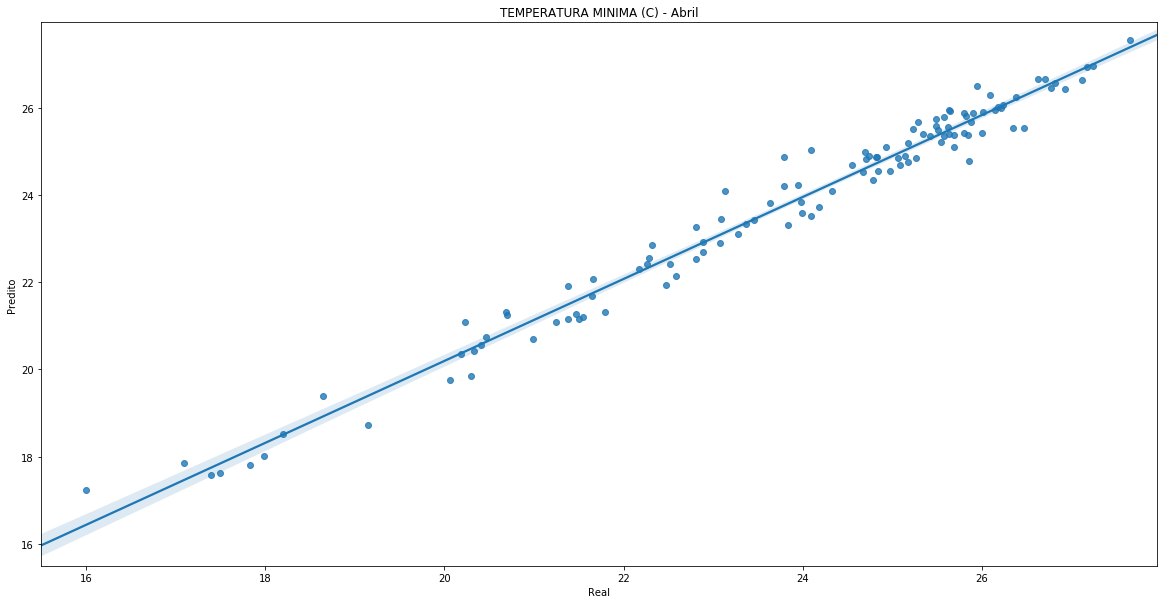

In [44]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Abril')
plt.savefig('../Validacao/graph/T_min_abr.png')

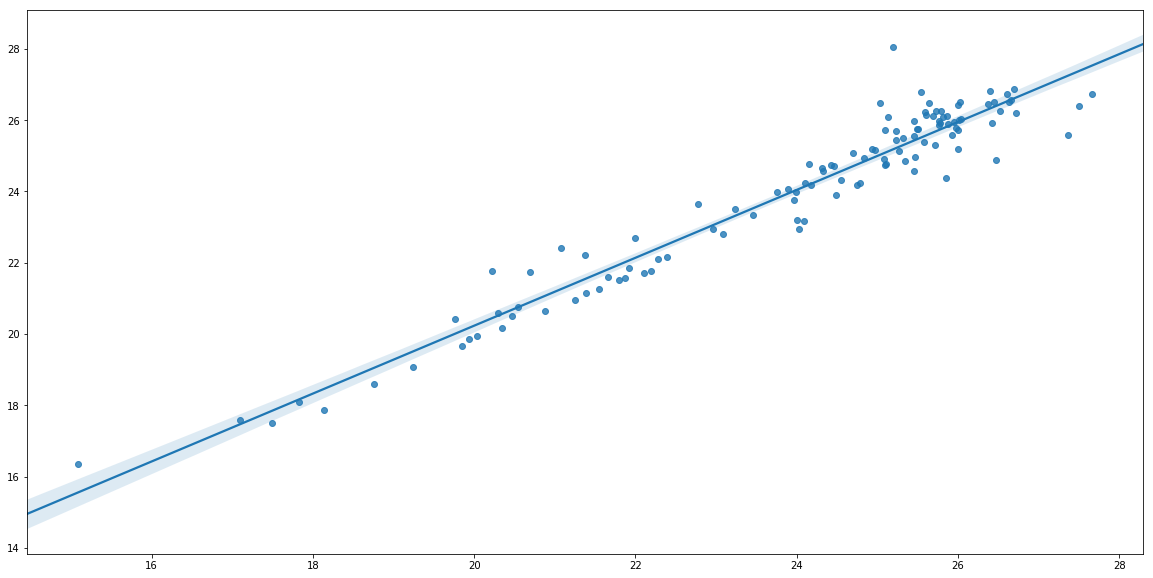

In [128]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [45]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmin_erros.loc[4]=['Abril',len(data_mean_abr),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmin_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.285347,0.006426,1.111632,0.226298,0.956822,0.956242,0.285347,0.132634,0.000208,0.229920
2,Fevereiro,458,0.317814,0.002874,1.012298,0.209892,0.945446,0.945382,0.317814,0.145060,0.000224,0.277784
3,Março,458,0.319620,0.003542,1.132784,0.244037,0.971480,0.970403,0.319620,0.161711,0.000259,0.263184
4,Abril,461,0.318131,0.018382,1.230502,0.251195,0.975498,0.975311,0.318131,0.164306,0.000300,0.260236


In [46]:
pickle.dump(mlp,open('../Models/Tmin/tmin_4.model','wb'))

## Maio

In [47]:
data_mean_mai = pd.read_csv('../Dados/Brasil_5_mean.csv')

In [80]:
data_mean_mai.describe().T

,count,mean,std,min,25%,50%,75%,max
Altitude(metros),461.0,365.451193,282.146432,2.000000,112.000000,324.000000,552.000000,997.000000
Codigo OMM,461.0,85210.234273,2320.555153,81609.000000,81951.000000,86707.000000,86854.000000,86998.000000
Day,461.0,16.063091,0.749579,14.866300,15.933319,16.000150,16.112511,30.687500
H(UTC),461.0,11.564696,0.158921,10.250000,11.500000,11.514337,11.589424,13.132931
Latitude,461.0,-15.340775,8.258403,-33.742297,-21.855567,-15.244620,-8.509552,3.813583
Longitude,461.0,-48.004837,7.244575,-72.786778,-52.931912,-48.201231,-42.182817,-34.815627
Month,461.0,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000
PRECIPITACAO (mm),461.0,0.123193,0.103104,0.000000,0.047625,0.098771,0.159330,0.571102
PRESSAO ATMOSFERICA (hPa),461.0,973.251006,30.782970,905.382490,951.965793,977.813119,1000.788735,1017.905242
PRESSAO ATMOSFÉRICA MAXIMA (hPa),461.0,973.514332,30.799190,905.591783,952.204472,978.066443,1001.074621,1018.129239


In [48]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_mai[features], 
                                                    data_mean_mai[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9792608215270071
MAE: 0.41812451640353987
MSE: 0.2888264620819523
MSLE: 0.0005750252629996264
MedLE: 0.3715102318009613
R2 Score: 0.979102501815953

Error(UR_true - UR_pred)

MIN: 0.004920375473250971 
MAX: 1.6478607341851443 
MEAN: 0.41812451640353987
Std: 0.33763641815458556


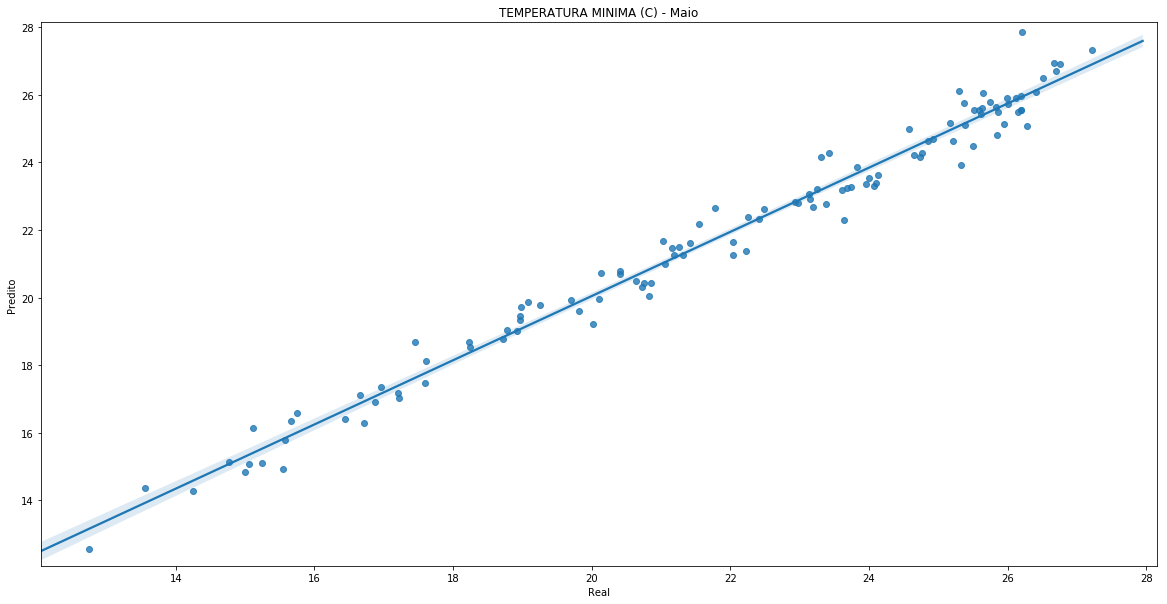

In [49]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Maio')
plt.savefig('../Validacao/graph/T_min_mai.png')

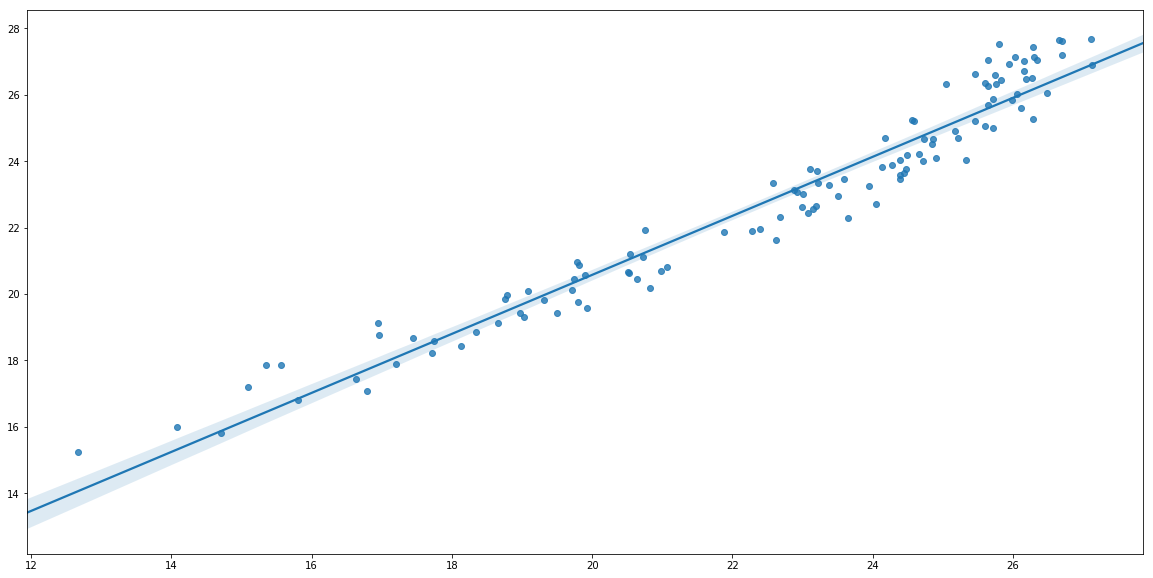

In [300]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [50]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmin_erros.loc[5]=['Maio',len(data_mean_mai),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmin_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.285347,0.006426,1.111632,0.226298,0.956822,0.956242,0.285347,0.132634,0.000208,0.229920
2,Fevereiro,458,0.317814,0.002874,1.012298,0.209892,0.945446,0.945382,0.317814,0.145060,0.000224,0.277784
3,Março,458,0.319620,0.003542,1.132784,0.244037,0.971480,0.970403,0.319620,0.161711,0.000259,0.263184
4,Abril,461,0.318131,0.018382,1.230502,0.251195,0.975498,0.975311,0.318131,0.164306,0.000300,0.260236
5,Maio,461,0.418125,0.004920,1.647861,0.337636,0.979261,0.979103,0.418125,0.288826,0.000575,0.371510


In [51]:
pickle.dump(mlp,open('../Models/Tmin/tmin_5.model','wb'))

## Junho

In [52]:
data_mean_jun = pd.read_csv('../Dados/Brasil_6_mean.csv')

In [139]:
data_mean_jun.describe().T

,count,mean,std,min,25%,50%,75%,max
Altitude(metros),467.0,367.693790,282.317818,2.000000,112.000000,327.000000,562.000000,997.000000
Codigo OMM,467.0,85230.062099,2312.154651,81609.000000,81952.500000,86709.000000,86853.500000,86998.000000
Day,467.0,15.568692,0.741648,13.869565,15.427756,15.501777,15.626502,28.855263
H(UTC),467.0,11.568056,0.130018,11.231362,11.496405,11.517130,11.595407,12.613508
Latitude,467.0,-15.366610,8.230777,-33.742297,-21.818064,-15.280215,-8.632726,3.813583
Longitude,467.0,-47.955419,7.218061,-72.786778,-52.882993,-48.177259,-42.216593,-34.815627
Month,467.0,6.000000,0.000000,6.000000,6.000000,6.000000,6.000000,6.000000
PRECIPITACAO (mm),467.0,0.092087,0.090984,0.000000,0.020936,0.060299,0.140960,0.553616
PRESSAO ATMOSFERICA (hPa),467.0,974.401556,30.842412,906.991212,953.436232,978.078470,1001.946532,1019.285201
PRESSAO ATMOSFÉRICA MAXIMA (hPa),467.0,974.654954,30.853832,907.195698,953.680282,978.339451,1002.213206,1019.558895


In [54]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_jun[features], 
                                                    data_mean_jun[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9873460825238972
MAE: 0.3745341682577661
MSE: 0.2556647196781421
MSLE: 0.0007174443477444922
MedLE: 0.2793490312560998
R2 Score: 0.9872063504076288

Error(UR_true - UR_pred)

MIN: 0.003789093685838907 
MAX: 1.9935464556519165 
MEAN: 0.3745341682577661
Std: 0.33968938235630136


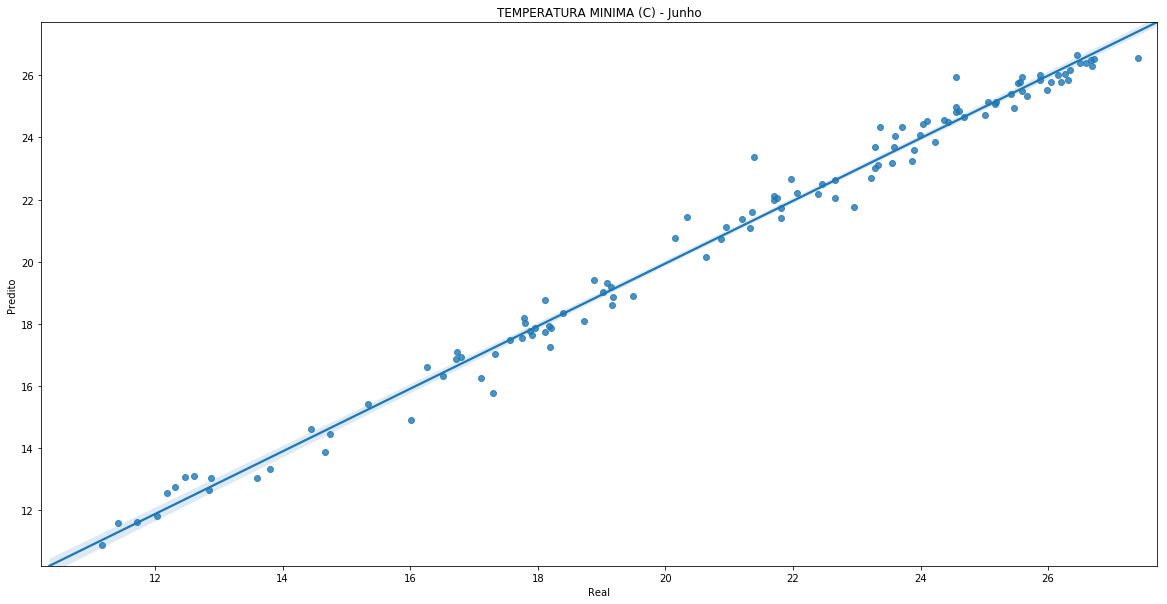

In [60]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())+0.3,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())+0.3,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Junho')
plt.savefig('../Validacao/graph/T_min_jun.png')

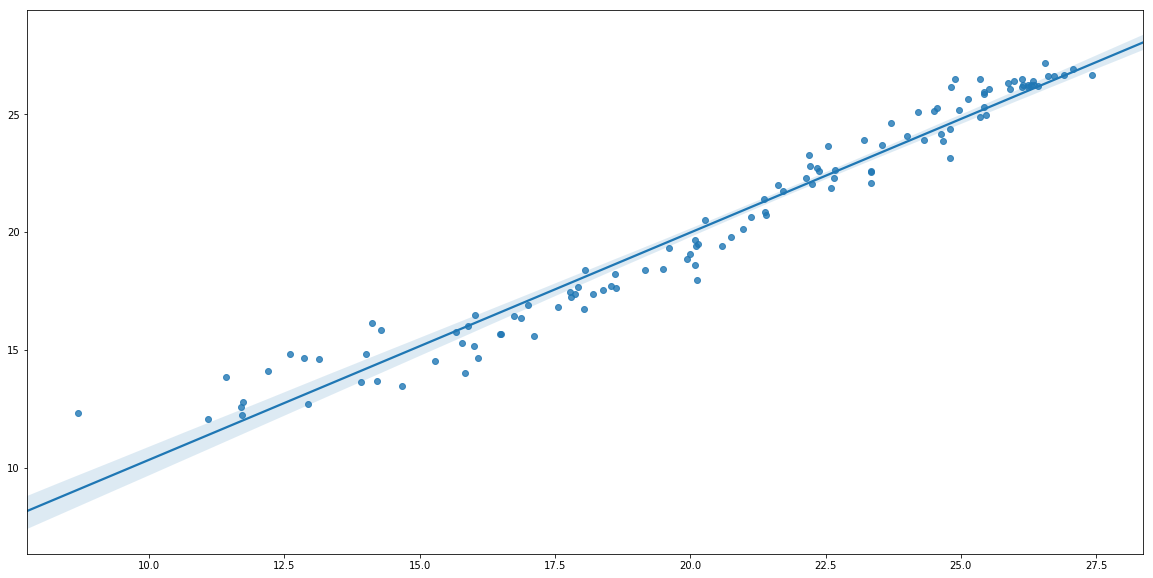

In [146]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [61]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmin_erros.loc[6]=['Junho',len(data_mean_jun),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmin_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.285347,0.006426,1.111632,0.226298,0.956822,0.956242,0.285347,0.132634,0.000208,0.229920
2,Fevereiro,458,0.317814,0.002874,1.012298,0.209892,0.945446,0.945382,0.317814,0.145060,0.000224,0.277784
3,Março,458,0.319620,0.003542,1.132784,0.244037,0.971480,0.970403,0.319620,0.161711,0.000259,0.263184
4,Abril,461,0.318131,0.018382,1.230502,0.251195,0.975498,0.975311,0.318131,0.164306,0.000300,0.260236
5,Maio,461,0.418125,0.004920,1.647861,0.337636,0.979261,0.979103,0.418125,0.288826,0.000575,0.371510
6,Junho,467,0.374534,0.003789,1.993546,0.339689,0.987346,0.987206,0.374534,0.255665,0.000717,0.279349


In [62]:
pickle.dump(mlp,open('../Models/Tmin/tmin_6.model','wb'))

## Julho

In [63]:
data_mean_jul = pd.read_csv('../Dados/Brasil_7_mean.csv')

In [152]:
data_mean_jul.describe().T

,count,mean,std,min,25%,50%,75%,max
Altitude(metros),467.0,366.839745,282.822694,1.161000,111.000000,324.000000,562.000000,997.000000
Codigo OMM,467.0,85230.299786,2312.301895,81609.000000,81952.500000,86710.000000,86853.500000,86998.000000
Day,467.0,16.028319,0.561838,5.750000,15.951357,16.000000,16.134801,17.969512
H(UTC),467.0,11.559463,0.226912,7.500000,11.500000,11.523430,11.594776,12.884146
Latitude,467.0,-15.379002,8.227039,-33.742297,-21.818064,-15.300159,-8.632726,3.813583
Longitude,467.0,-47.967093,7.213583,-72.786778,-52.882993,-48.177259,-42.216593,-34.815627
Month,467.0,7.000000,0.000000,7.000000,7.000000,7.000000,7.000000,7.000000
PRECIPITACAO (mm),467.0,0.076520,0.083894,0.000000,0.011619,0.041308,0.126478,0.406668
PRESSAO ATMOSFERICA (hPa),467.0,974.856763,30.987094,907.332957,953.696769,979.209565,1002.371722,1020.211619
PRESSAO ATMOSFÉRICA MAXIMA (hPa),467.0,974.845937,31.182594,890.525000,953.792560,979.070903,1002.534100,1020.436177


In [69]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_jul[features], 
                                                    data_mean_jul[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9767675938817654
MAE: 0.44226648299306176
MSE: 0.3774837586327997
MSLE: 0.0008381810233328812
MedLE: 0.32386742810456326
R2 Score: 0.976594655289431

Error(UR_true - UR_pred)

MIN: 0.0032015617929559426 
MAX: 2.2639961131789264 
MEAN: 0.44226648299306176
Std: 0.42647874115100703


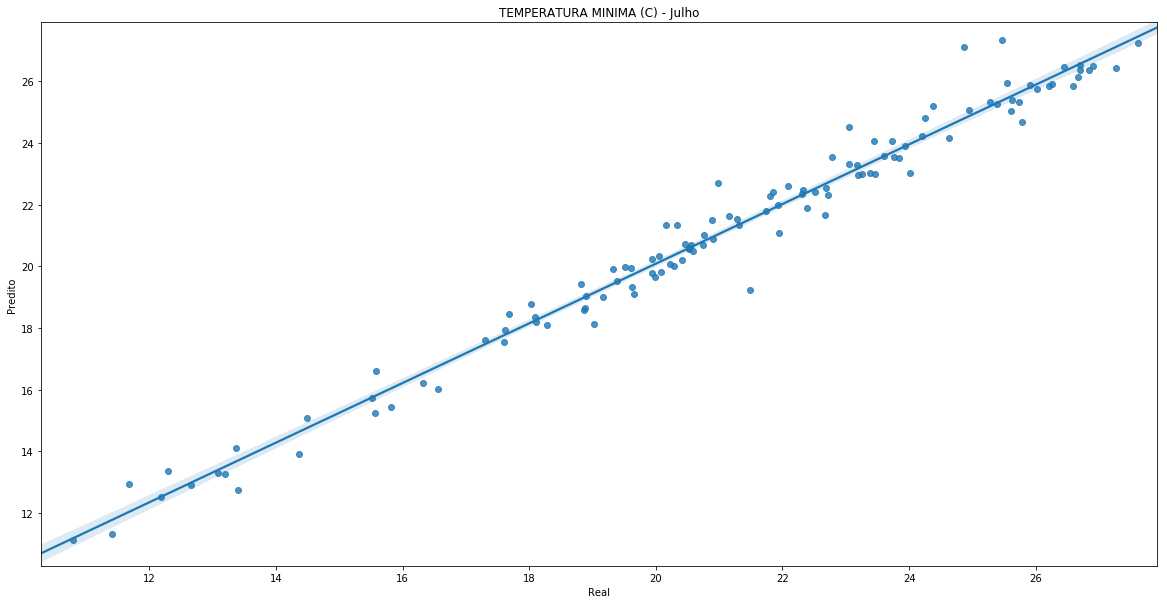

In [71]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Julho')
plt.savefig('../Validacao/graph/T_min_jul.png')

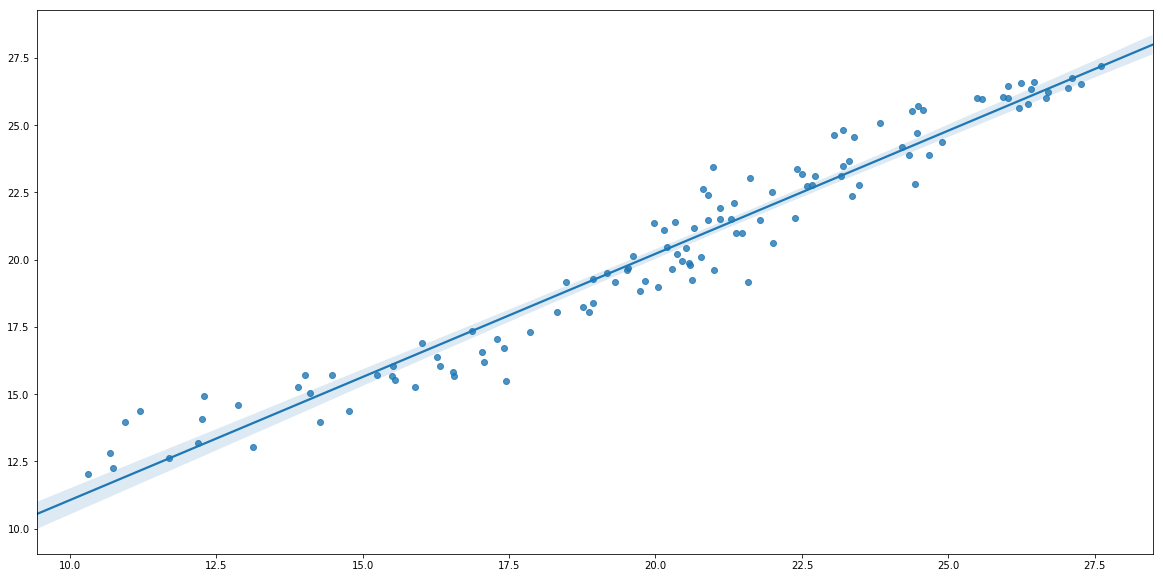

In [158]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [70]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmin_erros.loc[7]=['Julho',len(data_mean_jul),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmin_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.285347,0.006426,1.111632,0.226298,0.956822,0.956242,0.285347,0.132634,0.000208,0.229920
2,Fevereiro,458,0.317814,0.002874,1.012298,0.209892,0.945446,0.945382,0.317814,0.145060,0.000224,0.277784
3,Março,458,0.319620,0.003542,1.132784,0.244037,0.971480,0.970403,0.319620,0.161711,0.000259,0.263184
4,Abril,461,0.318131,0.018382,1.230502,0.251195,0.975498,0.975311,0.318131,0.164306,0.000300,0.260236
5,Maio,461,0.418125,0.004920,1.647861,0.337636,0.979261,0.979103,0.418125,0.288826,0.000575,0.371510
6,Junho,467,0.374534,0.003789,1.993546,0.339689,0.987346,0.987206,0.374534,0.255665,0.000717,0.279349
7,Julho,467,0.442266,0.003202,2.263996,0.426479,0.976768,0.976595,0.442266,0.377484,0.000838,0.323867


In [72]:
pickle.dump(mlp,open('../Models/Tmin/tmin_7.model','wb'))

## Agosto

In [73]:
data_mean_ago = pd.read_csv('../Dados/Brasil_8_mean.csv')

In [180]:
data_mean_ago.describe().T

,count,mean,std,min,25%,50%,75%,max
Altitude(metros),468.0,367.119658,282.163663,2.000000,112.000000,325.500000,560.500000,997.000000
Codigo OMM,468.0,85223.752137,2315.358203,81609.000000,81951.750000,86709.500000,86854.250000,86998.000000
Day,468.0,16.071623,0.416195,12.961975,15.967339,16.010348,16.131188,18.653521
H(UTC),468.0,11.552209,0.126788,10.939145,11.494913,11.507641,11.574038,12.459746
Latitude,468.0,-15.393529,8.258124,-33.742297,-21.886764,-15.290187,-8.576477,3.813583
Longitude,468.0,-47.985259,7.214612,-72.786778,-52.900595,-48.193060,-42.233481,-34.815627
Month,468.0,8.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000
PRECIPITACAO (mm),468.0,0.056369,0.063121,0.000000,0.007552,0.030055,0.084163,0.312555
PRESSAO ATMOSFERICA (hPa),468.0,974.167542,30.927305,906.768525,952.962715,978.414745,1001.560622,1020.100350
PRESSAO ATMOSFÉRICA MAXIMA (hPa),468.0,974.442797,30.936778,906.999313,953.227630,978.693134,1001.851091,1020.337493


In [77]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_ago[features], 
                                                    data_mean_ago[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9771106419518086
MAE: 0.460294186055826
MSE: 0.3648305697521379
MSLE: 0.0007584654345511409
MedLE: 0.3423655077558365
R2 Score: 0.9756988926704289

Error(UR_true - UR_pred)

MIN: 0.003975472729223384 
MAX: 2.097320891056178 
MEAN: 0.460294186055826
Std: 0.39110079523742025


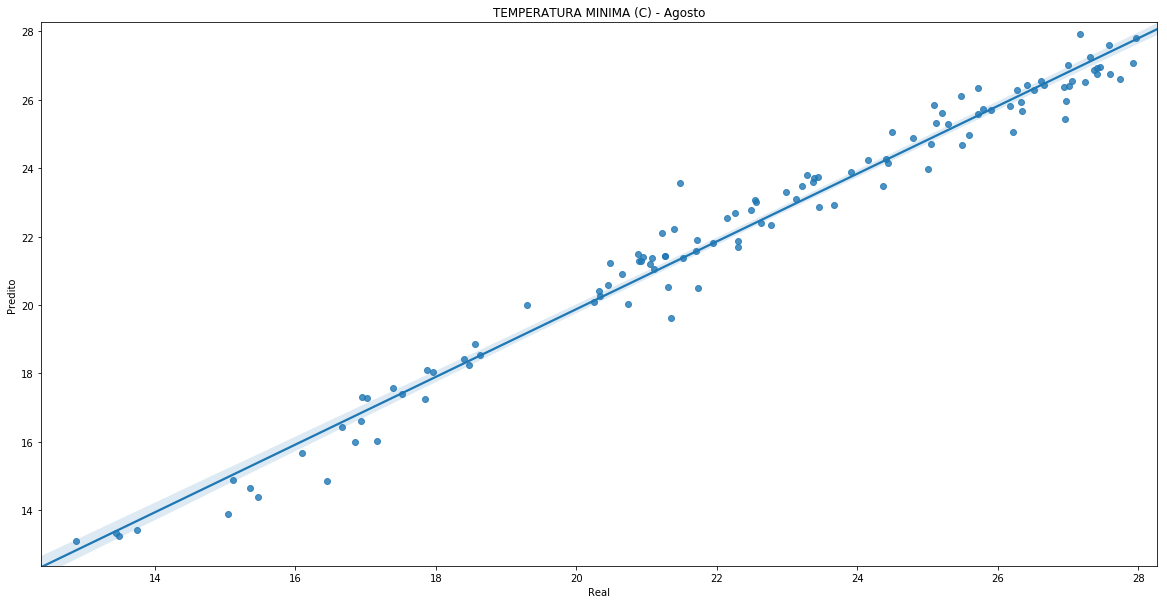

In [80]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Agosto')
plt.savefig('../Validacao/graph/T_min_ago.png')

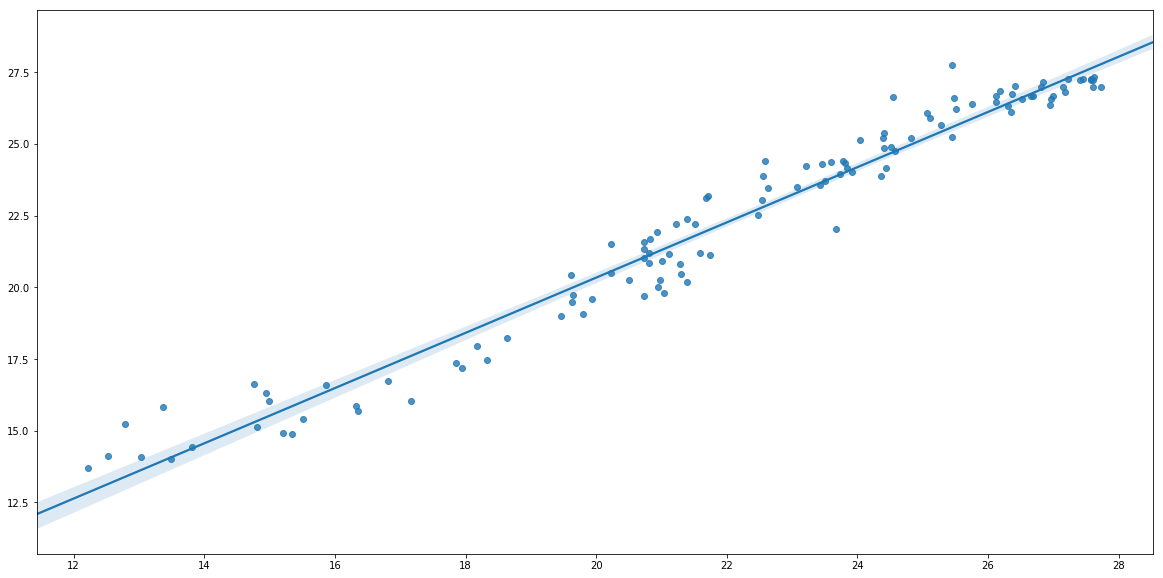

In [184]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [78]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmin_erros.loc[8]=['Agosto',len(data_mean_ago),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmin_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.285347,0.006426,1.111632,0.226298,0.956822,0.956242,0.285347,0.132634,0.000208,0.229920
2,Fevereiro,458,0.317814,0.002874,1.012298,0.209892,0.945446,0.945382,0.317814,0.145060,0.000224,0.277784
3,Março,458,0.319620,0.003542,1.132784,0.244037,0.971480,0.970403,0.319620,0.161711,0.000259,0.263184
4,Abril,461,0.318131,0.018382,1.230502,0.251195,0.975498,0.975311,0.318131,0.164306,0.000300,0.260236
5,Maio,461,0.418125,0.004920,1.647861,0.337636,0.979261,0.979103,0.418125,0.288826,0.000575,0.371510
6,Junho,467,0.374534,0.003789,1.993546,0.339689,0.987346,0.987206,0.374534,0.255665,0.000717,0.279349
7,Julho,467,0.442266,0.003202,2.263996,0.426479,0.976768,0.976595,0.442266,0.377484,0.000838,0.323867
8,Agosto,468,0.460294,0.003975,2.097321,0.391101,0.977111,0.975699,0.460294,0.364831,0.000758,0.342366


In [79]:
pickle.dump(mlp,open('../Models/Tmin/tmin_8.model','wb'))

## Setembro

In [81]:
data_mean_set = pd.read_csv('../Dados/Brasil_9_mean.csv')

In [170]:
data_mean_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Altitude(metros),470.0,366.929787,281.621882,2.000000,112.250000,325.500000,557.250000,997.000000
Codigo OMM,470.0,85219.608511,2316.393599,81609.000000,81951.250000,86708.000000,86853.750000,86998.000000
Day,470.0,15.587736,0.502135,12.930233,15.472327,15.501545,15.629294,21.784689
H(UTC),470.0,11.546775,0.118220,10.413861,11.498987,11.510020,11.583166,12.175851
Latitude,470.0,-15.364434,8.253072,-33.742297,-21.836815,-15.262417,-8.531860,3.813583
Longitude,470.0,-47.977661,7.204263,-72.786778,-52.886575,-48.193060,-42.252647,-34.815627
Month,470.0,9.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000
PRECIPITACAO (mm),470.0,0.082031,0.073555,0.000000,0.025846,0.061013,0.124676,0.326794
PRESSAO ATMOSFERICA (hPa),470.0,973.048147,31.054667,905.037045,951.463353,977.128447,1000.683673,1018.536817
PRESSAO ATMOSFÉRICA MAXIMA (hPa),470.0,973.353452,31.063006,905.304832,951.784577,977.450541,1000.980359,1018.805309


In [88]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_set[features], 
                                                    data_mean_set[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9793742472053131
MAE: 0.3986494115953362
MSE: 0.2848671261943391
MSLE: 0.00048547672562181886
MedLE: 0.30929712437779067
R2 Score: 0.9793731251253592

Error(UR_true - UR_pred)

MIN: 0.00035324131422243 
MAX: 1.7936951036113342 
MEAN: 0.3986494115953362
Std: 0.3548883948920159


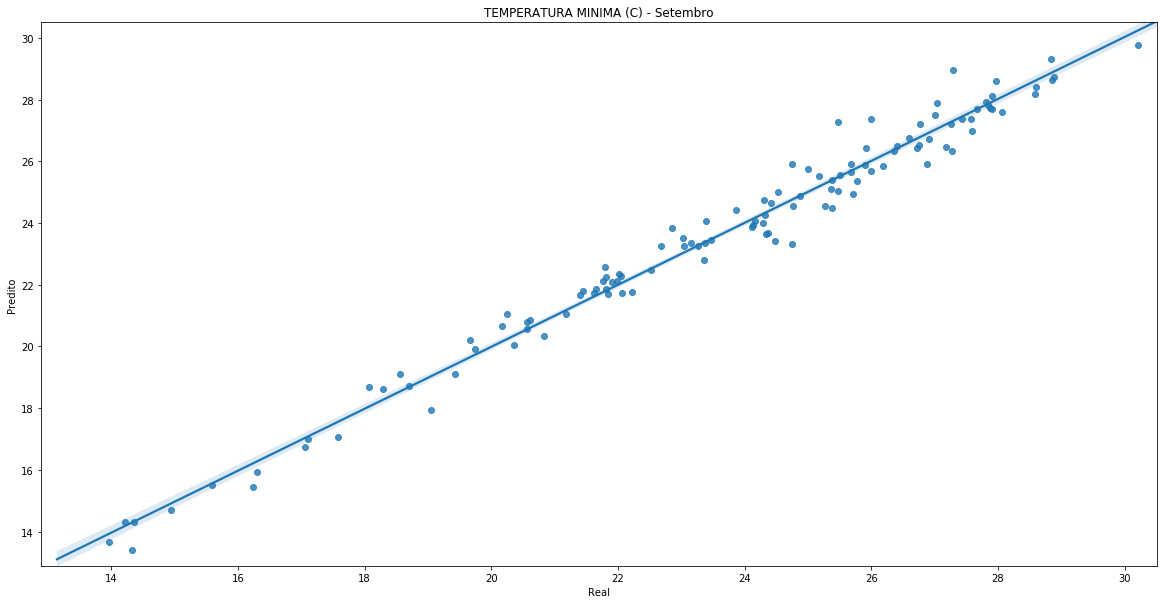

In [89]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Setembro')
plt.savefig('../Validacao/graph/T_min_set.png')

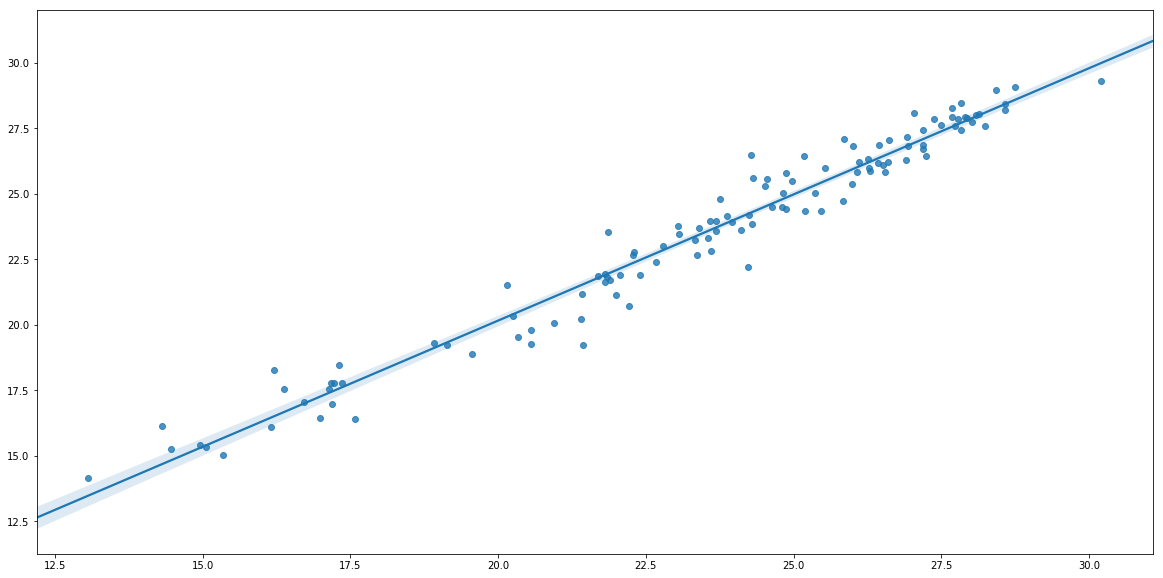

In [176]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [90]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmin_erros.loc[9]=['Setembro',len(data_mean_set),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmin_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.285347,0.006426,1.111632,0.226298,0.956822,0.956242,0.285347,0.132634,0.000208,0.229920
2,Fevereiro,458,0.317814,0.002874,1.012298,0.209892,0.945446,0.945382,0.317814,0.145060,0.000224,0.277784
3,Março,458,0.319620,0.003542,1.132784,0.244037,0.971480,0.970403,0.319620,0.161711,0.000259,0.263184
4,Abril,461,0.318131,0.018382,1.230502,0.251195,0.975498,0.975311,0.318131,0.164306,0.000300,0.260236
5,Maio,461,0.418125,0.004920,1.647861,0.337636,0.979261,0.979103,0.418125,0.288826,0.000575,0.371510
6,Junho,467,0.374534,0.003789,1.993546,0.339689,0.987346,0.987206,0.374534,0.255665,0.000717,0.279349
7,Julho,467,0.442266,0.003202,2.263996,0.426479,0.976768,0.976595,0.442266,0.377484,0.000838,0.323867
8,Agosto,468,0.460294,0.003975,2.097321,0.391101,0.977111,0.975699,0.460294,0.364831,0.000758,0.342366
9,Setembro,470,0.398649,0.000353,1.793695,0.354888,0.979374,0.979373,0.398649,0.284867,0.000485,0.309297


In [91]:
pickle.dump(mlp,open('../Models/Tmin/tmin_9.model','wb'))

## Outubro

In [92]:
data_mean_out = pd.read_csv('../Dados/Brasil_10_mean.csv')

In [188]:
data_mean_out.describe().T

,count,mean,std,min,25%,50%,75%,max
Altitude(metros),458.0,365.521834,282.831588,2.000000,108.250000,318.500000,557.250000,997.000000
Codigo OMM,458.0,85201.056769,2325.371846,81609.000000,81950.250000,86710.000000,86854.750000,86998.000000
Day,458.0,16.061867,0.290188,15.217968,15.976132,16.022788,16.121040,18.314941
H(UTC),458.0,11.560298,0.110060,11.120285,11.512070,11.524020,11.581455,12.879358
Latitude,458.0,-15.371909,8.276341,-33.742297,-21.949157,-15.290187,-8.505388,3.813583
Longitude,458.0,-48.015097,7.263208,-72.786778,-52.955566,-48.228444,-42.155827,-34.815627
Month,458.0,10.000000,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000
PRECIPITACAO (mm),458.0,0.131662,0.078302,0.000000,0.073523,0.128828,0.182322,0.456183
PRESSAO ATMOSFERICA (hPa),458.0,971.318067,31.162328,903.264795,949.499793,975.195803,999.587317,1015.755566
PRESSAO ATMOSFÉRICA MAXIMA (hPa),458.0,971.631985,31.171819,903.536344,949.811199,975.505647,999.904376,1016.030281


In [97]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_out[features], 
                                                    data_mean_out[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9772893551909508
MAE: 0.38311967340747516
MSE: 0.2263176095217017
MSLE: 0.00038396805751310224
MedLE: 0.34734625156522725
R2 Score: 0.9772284844828726

Error(UR_true - UR_pred)

MIN: 0.006776767157404606 
MAX: 1.158115631779097 
MEAN: 0.38311967340747516
Std: 0.2820229163912949


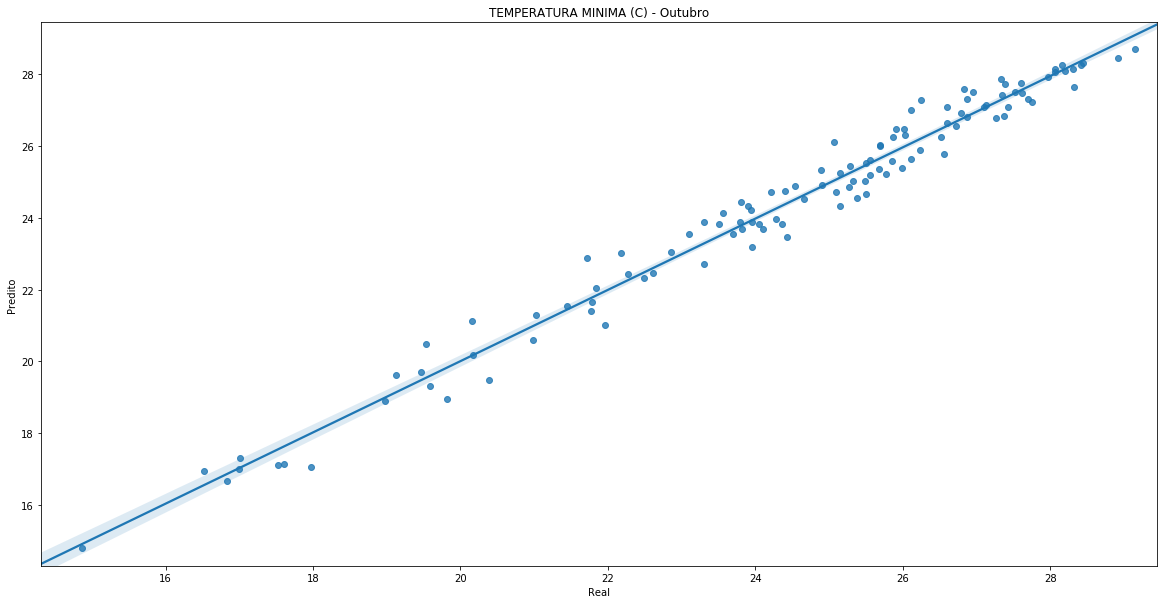

In [98]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Outubro')
plt.savefig('../Validacao/graph/T_min_out.png')

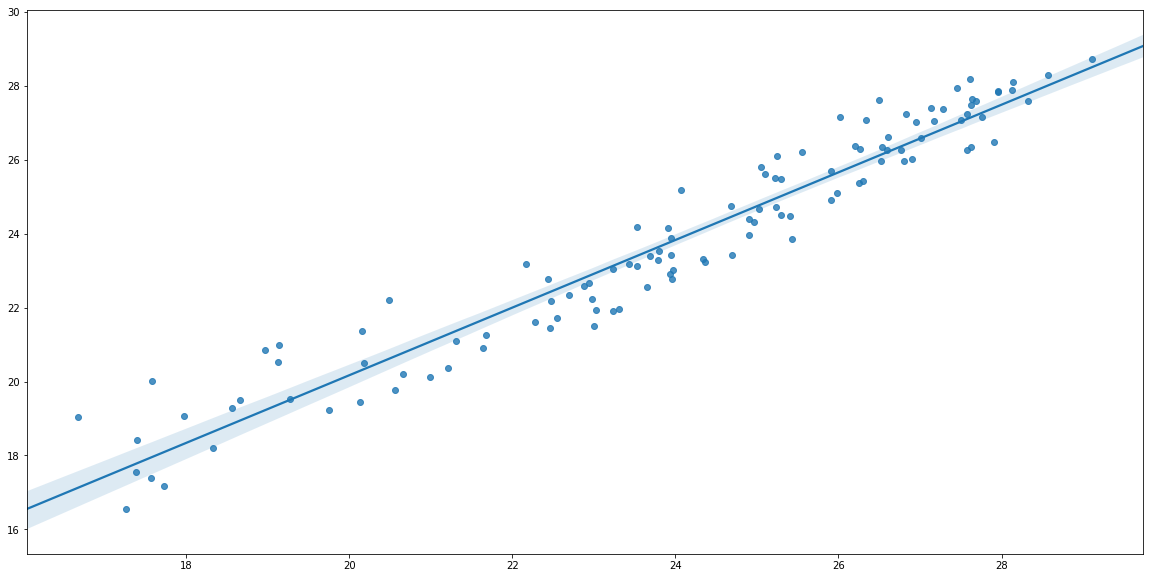

In [328]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [99]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmin_erros.loc[10]=['Outubro',len(data_mean_out),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmin_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.285347,0.006426,1.111632,0.226298,0.956822,0.956242,0.285347,0.132634,0.000208,0.229920
2,Fevereiro,458,0.317814,0.002874,1.012298,0.209892,0.945446,0.945382,0.317814,0.145060,0.000224,0.277784
3,Março,458,0.319620,0.003542,1.132784,0.244037,0.971480,0.970403,0.319620,0.161711,0.000259,0.263184
4,Abril,461,0.318131,0.018382,1.230502,0.251195,0.975498,0.975311,0.318131,0.164306,0.000300,0.260236
5,Maio,461,0.418125,0.004920,1.647861,0.337636,0.979261,0.979103,0.418125,0.288826,0.000575,0.371510
6,Junho,467,0.374534,0.003789,1.993546,0.339689,0.987346,0.987206,0.374534,0.255665,0.000717,0.279349
7,Julho,467,0.442266,0.003202,2.263996,0.426479,0.976768,0.976595,0.442266,0.377484,0.000838,0.323867
8,Agosto,468,0.460294,0.003975,2.097321,0.391101,0.977111,0.975699,0.460294,0.364831,0.000758,0.342366
9,Setembro,470,0.398649,0.000353,1.793695,0.354888,0.979374,0.979373,0.398649,0.284867,0.000485,0.309297
10,Outubro,458,0.383120,0.006777,1.158116,0.282023,0.977289,0.977228,0.383120,0.226318,0.000384,0.347346


In [100]:
pickle.dump(mlp,open('../Models/Tmin/tmin_10.model','wb'))

## Novembro

In [101]:
data_mean_nov = pd.read_csv('../Dados/Brasil_11_mean.csv')

In [205]:
data_mean_nov.describe().T

,count,mean,std,min,25%,50%,75%,max
Altitude(metros),459.0,364.728020,283.034068,1.161000,105.500000,313.000000,555.500000,997.000000
Codigo OMM,459.0,85204.355120,2323.906472,81609.000000,81950.500000,86711.000000,86854.500000,86998.000000
Day,459.0,15.484228,0.694570,2.000000,15.446692,15.500000,15.613861,17.454847
H(UTC),459.0,11.542632,0.556821,0.000000,11.500000,11.513941,11.591346,13.131043
Latitude,459.0,-15.372818,8.267324,-33.742297,-21.917960,-15.300159,-8.506776,3.813583
Longitude,459.0,-48.014903,7.255276,-72.786778,-52.947681,-48.201231,-42.164824,-34.815627
Month,459.0,11.000000,0.000000,11.000000,11.000000,11.000000,11.000000,11.000000
PRECIPITACAO (mm),459.0,0.184631,0.105958,0.000000,0.101004,0.195137,0.261841,0.583006
PRESSAO ATMOSFERICA (hPa),459.0,969.885133,31.110715,901.802811,948.560477,974.051447,997.497774,1013.363681
PRESSAO ATMOSFÉRICA MAXIMA (hPa),459.0,969.944415,31.338606,886.100000,948.766735,974.066673,997.792562,1013.630146


In [127]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_nov[features], 
                                                    data_mean_nov[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.980112683967122
MAE: 0.28988632534165154
MSE: 0.15362095018426902
MSLE: 0.00026278730827554913
MedLE: 0.24333468759959587
R2 Score: 0.9800693302412079

Error(UR_true - UR_pred)

MIN: 0.003738852556381289 
MAX: 1.7328020988694242 
MEAN: 0.28988632534165154
Std: 0.26379323070197075


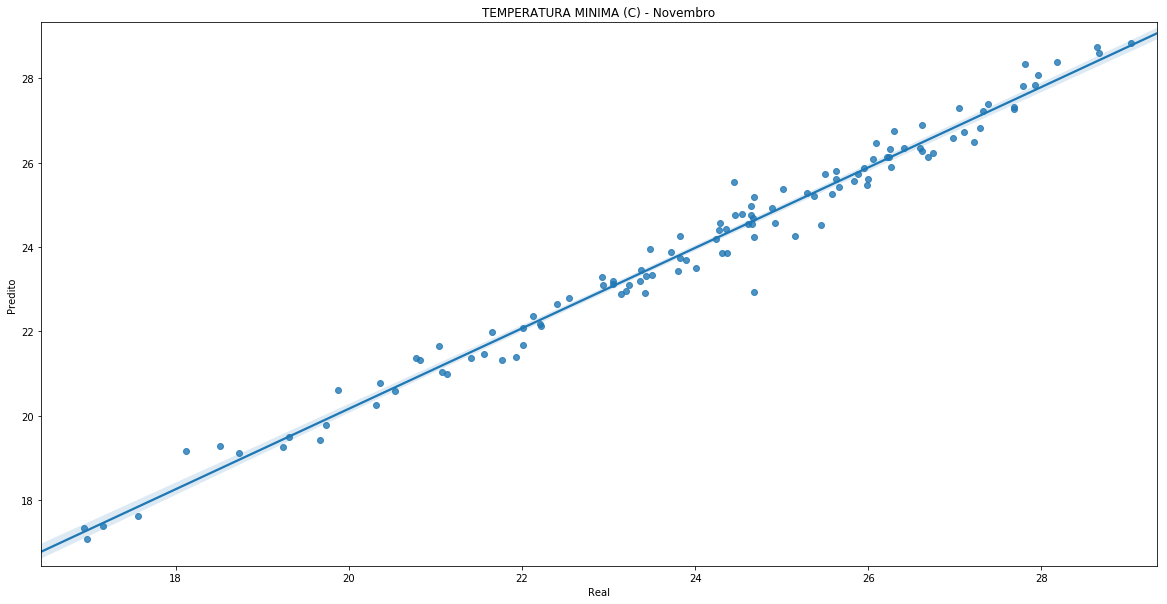

In [128]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Novembro')
plt.savefig('../Validacao/graph/T_min_nov.png')

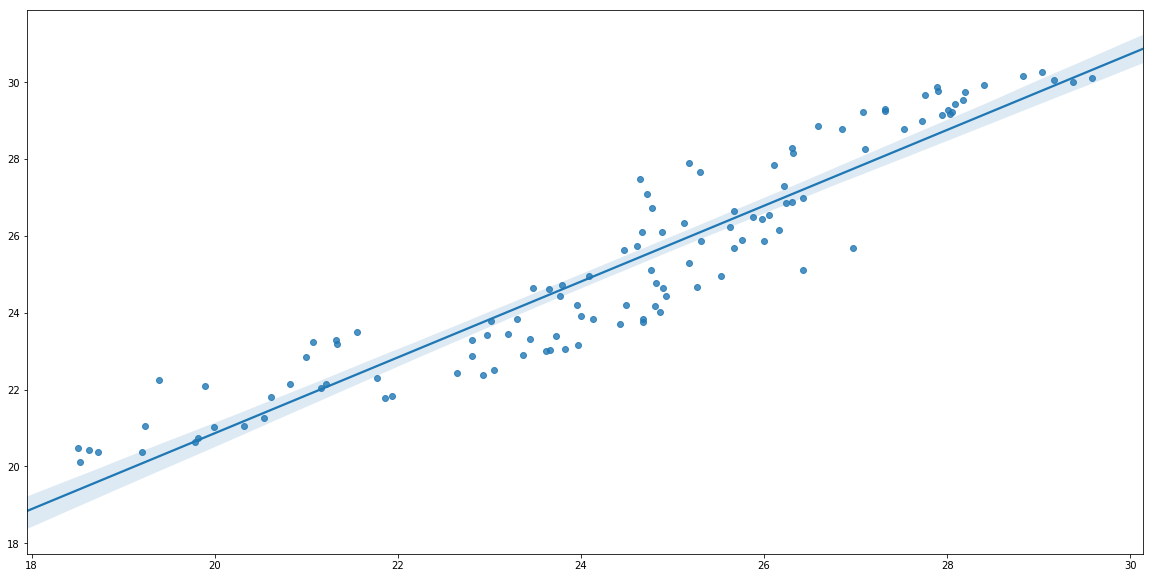

In [258]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [107]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmin_erros.loc[11]=['Novembro',len(data_mean_nov),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmin_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.285347,0.006426,1.111632,0.226298,0.956822,0.956242,0.285347,0.132634,0.000208,0.229920
2,Fevereiro,458,0.317814,0.002874,1.012298,0.209892,0.945446,0.945382,0.317814,0.145060,0.000224,0.277784
3,Março,458,0.319620,0.003542,1.132784,0.244037,0.971480,0.970403,0.319620,0.161711,0.000259,0.263184
4,Abril,461,0.318131,0.018382,1.230502,0.251195,0.975498,0.975311,0.318131,0.164306,0.000300,0.260236
5,Maio,461,0.418125,0.004920,1.647861,0.337636,0.979261,0.979103,0.418125,0.288826,0.000575,0.371510
6,Junho,467,0.374534,0.003789,1.993546,0.339689,0.987346,0.987206,0.374534,0.255665,0.000717,0.279349
7,Julho,467,0.442266,0.003202,2.263996,0.426479,0.976768,0.976595,0.442266,0.377484,0.000838,0.323867
8,Agosto,468,0.460294,0.003975,2.097321,0.391101,0.977111,0.975699,0.460294,0.364831,0.000758,0.342366
9,Setembro,470,0.398649,0.000353,1.793695,0.354888,0.979374,0.979373,0.398649,0.284867,0.000485,0.309297
10,Outubro,458,0.383120,0.006777,1.158116,0.282023,0.977289,0.977228,0.383120,0.226318,0.000384,0.347346


In [109]:
pickle.dump(mlp,open('../Models/Tmin/tmin_11.model','wb'))

## Dezembro

In [108]:
data_mean_dez = pd.read_csv('../Dados/Brasil_12_mean.csv')

In [262]:
data_mean_dez.describe().T

,count,mean,std,min,25%,50%,75%,max
Altitude(metros),459.0,364.728020,283.034068,1.161000,105.500000,313.000000,555.500000,997.000000
Codigo OMM,459.0,85204.355120,2323.906472,81609.000000,81950.500000,86711.000000,86854.500000,86998.000000
Day,459.0,15.993210,0.439737,14.483051,15.904517,16.000000,16.041821,23.333333
H(UTC),459.0,11.571570,0.179161,10.000000,11.500000,11.511226,11.587442,13.029921
Latitude,459.0,-15.372818,8.267324,-33.742297,-21.917960,-15.300159,-8.506776,3.813583
Longitude,459.0,-48.014903,7.255276,-72.786778,-52.947681,-48.201231,-42.164824,-34.815627
Month,459.0,12.000000,0.000000,12.000000,12.000000,12.000000,12.000000,12.000000
PRECIPITACAO (mm),459.0,0.214803,0.117253,0.004032,0.129100,0.218265,0.288627,0.666667
PRESSAO ATMOSFERICA (hPa),459.0,969.699576,31.029332,901.765483,948.476784,973.798048,997.463733,1012.513974
PRESSAO ATMOSFÉRICA MAXIMA (hPa),459.0,969.805423,31.279263,886.666667,948.414544,974.075828,997.764394,1012.753169


In [119]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_dez[features], 
                                                    data_mean_dez[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.962681914863295
MAE: 0.3407786116549802
MSE: 0.16465659274977487
MSLE: 0.0002534756021740524
MedLE: 0.3006840622290312
R2 Score: 0.9625006387351208

Error(UR_true - UR_pred)

MIN: 0.007374654950659476 
MAX: 1.0905758604161804 
MEAN: 0.3407786116549802
Std: 0.22028738181811292


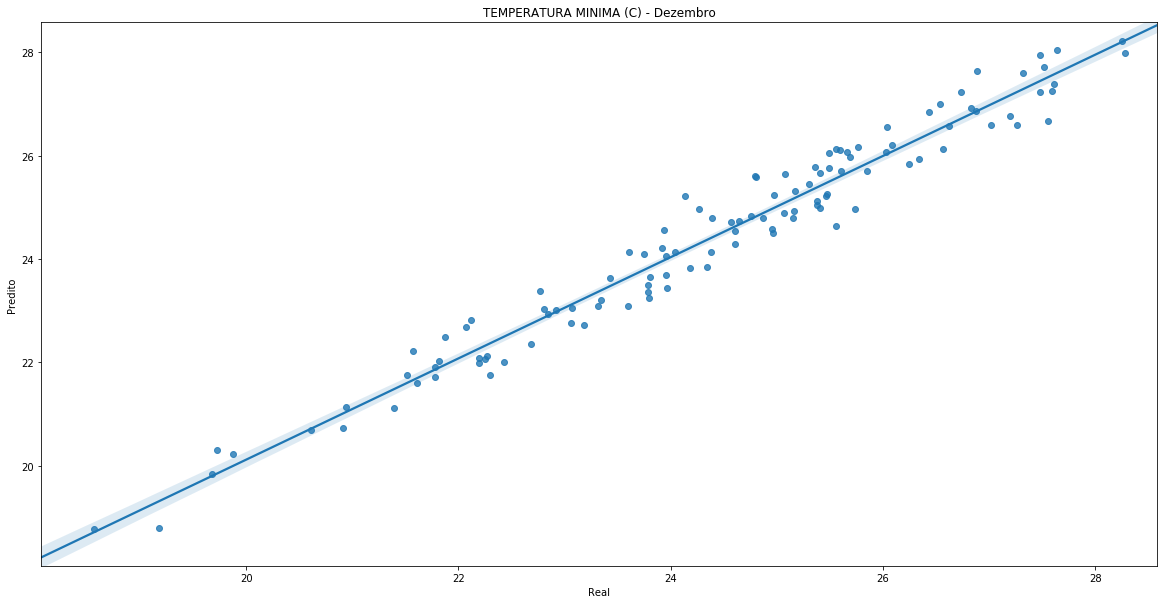

In [120]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Dezembro')
plt.savefig('../Validacao/graph/T_min_dez.png')

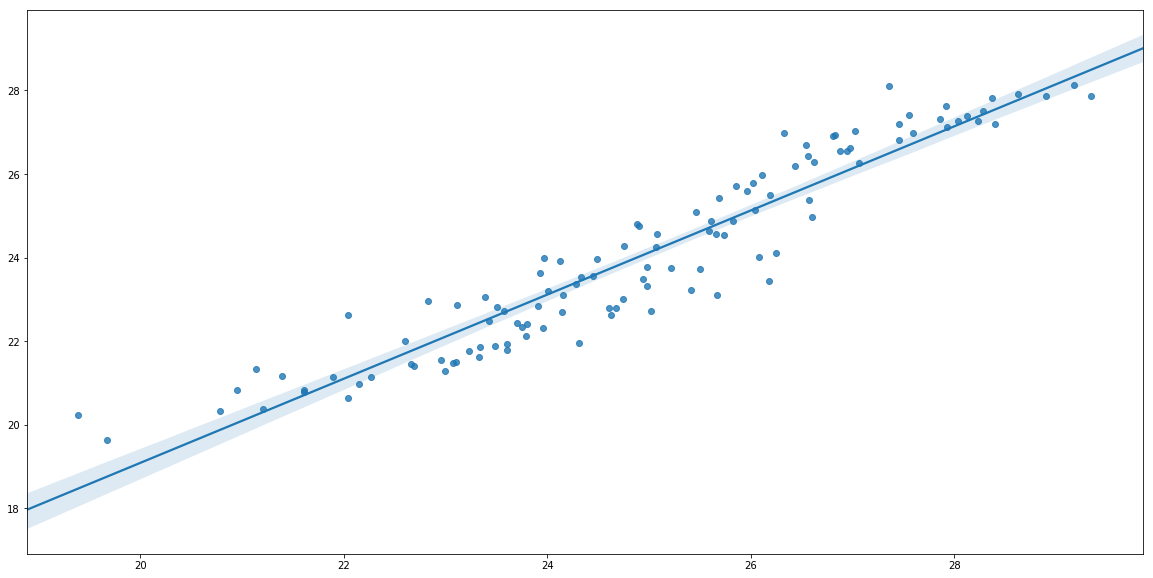

In [291]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [121]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmin_erros.loc[12]=['Dezembro',len(data_mean_dez),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmin_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.285347,0.006426,1.111632,0.226298,0.956822,0.956242,0.285347,0.132634,0.000208,0.229920
2,Fevereiro,458,0.317814,0.002874,1.012298,0.209892,0.945446,0.945382,0.317814,0.145060,0.000224,0.277784
3,Março,458,0.319620,0.003542,1.132784,0.244037,0.971480,0.970403,0.319620,0.161711,0.000259,0.263184
4,Abril,461,0.318131,0.018382,1.230502,0.251195,0.975498,0.975311,0.318131,0.164306,0.000300,0.260236
5,Maio,461,0.418125,0.004920,1.647861,0.337636,0.979261,0.979103,0.418125,0.288826,0.000575,0.371510
6,Junho,467,0.374534,0.003789,1.993546,0.339689,0.987346,0.987206,0.374534,0.255665,0.000717,0.279349
7,Julho,467,0.442266,0.003202,2.263996,0.426479,0.976768,0.976595,0.442266,0.377484,0.000838,0.323867
8,Agosto,468,0.460294,0.003975,2.097321,0.391101,0.977111,0.975699,0.460294,0.364831,0.000758,0.342366
9,Setembro,470,0.398649,0.000353,1.793695,0.354888,0.979374,0.979373,0.398649,0.284867,0.000485,0.309297
10,Outubro,458,0.383120,0.006777,1.158116,0.282023,0.977289,0.977228,0.383120,0.226318,0.000384,0.347346


In [122]:
pickle.dump(mlp,open('../Models/Tmin/tmin_12.model','wb'))

### Salvando as mestricas de avaliação

In [162]:
data_tmin_erros['std_target'] = [data_mean_jan[target].std()[0],
                                 data_mean_fev[target].std()[0],
 data_mean_mai[target].std()[0],data_mean_abr[target].std()[0],
 data_mean_mar[target].std()[0],data_mean_jun[target].std()[0],
 data_mean_jul[target].std()[0],data_mean_ago[target].std()[0],
 data_mean_set[target].std()[0],data_mean_out[target].std()[0],
 data_mean_nov[target].std()[0],data_mean_dez[target].std()[0]]
data_tmin_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE,std_target
1,Janeiro,458,0.285347,0.006426,1.111632,0.226298,0.956822,0.956242,0.285347,0.132634,0.000208,0.229920,1.801156
2,Fevereiro,458,0.317814,0.002874,1.012298,0.209892,0.945446,0.945382,0.317814,0.145060,0.000224,0.277784,1.695128
3,Março,458,0.319620,0.003542,1.132784,0.244037,0.971480,0.970403,0.319620,0.161711,0.000259,0.263184,3.827771
4,Abril,461,0.318131,0.018382,1.230502,0.251195,0.975498,0.975311,0.318131,0.164306,0.000300,0.260236,2.666834
5,Maio,461,0.418125,0.004920,1.647861,0.337636,0.979261,0.979103,0.418125,0.288826,0.000575,0.371510,2.118605
6,Junho,467,0.374534,0.003789,1.993546,0.339689,0.987346,0.987206,0.374534,0.255665,0.000717,0.279349,4.412019
7,Julho,467,0.442266,0.003202,2.263996,0.426479,0.976768,0.976595,0.442266,0.377484,0.000838,0.323867,4.319171
8,Agosto,468,0.460294,0.003975,2.097321,0.391101,0.977111,0.975699,0.460294,0.364831,0.000758,0.342366,4.066033
9,Setembro,470,0.398649,0.000353,1.793695,0.354888,0.979374,0.979373,0.398649,0.284867,0.000485,0.309297,4.020234
10,Outubro,458,0.383120,0.006777,1.158116,0.282023,0.977289,0.977228,0.383120,0.226318,0.000384,0.347346,3.312872


In [163]:
data_tmin_erros.to_csv('../Validacao/Tmin.csv',float_format='%.3f')